### Total Hypergraphs

In [1]:

import json
import os
from collections import defaultdict
import pandas as pd
# Folder containing the CSV files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024'
output_file = 'total_hypergraph_2017_2024.json'

# Initialize a dictionary to hold hyperedges for all files
all_hyperedges = defaultdict(set)

# Get the list of CSV files in the folder
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Process each CSV file in the folder
for filename in csv_files:
    filepath = os.path.join(input_folder, filename)
    
    # Print status
    print(f"Processing file: {filename}")
    
    try:
        # Read the CSV file
        df = pd.read_csv(filepath)
        
        # Initialize a dictionary to hold hyperedges for this file
        hyperedges = defaultdict(set)
        
        # Populate hyperedges for this file
        for _, row in df.iterrows():
            token = row['tokenAddressLabel']
            from_node = row['fromLabel']
            to_node = row['toLabel']
            hyperedges[token].add(from_node)
            hyperedges[token].add(to_node)
        
        # Update the global hyperedges dictionary
        for token, nodes in hyperedges.items():
            all_hyperedges[token].update(nodes)
        
        # Print progress
        print(f"File {filename} processed successfully.")
        
    except Exception as e:
        # Print error message if file processing fails
        print(f"Error processing file {filename}: {e}")

# Convert sets to lists for JSON serialization
hyperedges_dict = {token: list(nodes) for token, nodes in all_hyperedges.items()}

# Save the hyperedges to a JSON file
with open(output_file, 'w') as f:
    json.dump(hyperedges_dict, f, sort_keys=True, separators=(',', ':'))

print(f"Hypergraphs have been saved to {output_file}")


Processing file: 2020-06-30.csv
File 2020-06-30.csv processed successfully.
Processing file: 2023-07-18.csv
File 2023-07-18.csv processed successfully.
Processing file: 2021-01-25.csv
File 2021-01-25.csv processed successfully.
Processing file: 2023-04-30.csv
File 2023-04-30.csv processed successfully.
Processing file: 2019-03-15.csv
File 2019-03-15.csv processed successfully.
Processing file: 2020-12-01.csv
File 2020-12-01.csv processed successfully.
Processing file: 2018-01-14.csv
File 2018-01-14.csv processed successfully.
Processing file: 2017-10-09.csv
File 2017-10-09.csv processed successfully.
Processing file: 2021-02-02.csv
File 2021-02-02.csv processed successfully.
Processing file: 2018-11-19.csv
File 2018-11-19.csv processed successfully.
Processing file: 2019-07-24.csv
File 2019-07-24.csv processed successfully.
Processing file: 2021-07-06.csv
File 2021-07-06.csv processed successfully.
Processing file: 2021-01-26.csv
File 2021-01-26.csv processed successfully.
Processing f

In [1]:
import pandas as pd
import json
import os
from collections import defaultdict
from datetime import datetime
import re

# Folder containing the CSV files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024'
# Folder to save daily hypergraphs
output_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday_2017_2024'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Regular expression to extract date from filename
date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2})')

# Dictionary to hold hyperedges for each day
daily_hyperedges = defaultdict(lambda: defaultdict(set))

# Get the list of CSV files in the folder
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Process each CSV file in the folder
for filename in csv_files:
    filepath = os.path.join(input_folder, filename)
    
    # Print status
    print(f"Processing file: {filename}")
    
    try:
        # Extract the date from the filename using regular expression
        match = date_pattern.search(filename)
        if not match:
            print(f"Filename {filename} does not match expected date format.")
            continue
        
        date_str = match.group(1).replace('--', '-')  # Replace '--' with '-' to match '%Y-%m-%d' format
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        date_key = date_obj.strftime('%Y-%m-%d')  # Format date for key
        
        # Read the CSV file
        df = pd.read_csv(filepath)
        
        # Initialize a dictionary to hold hyperedges for this file
        hyperedges = defaultdict(set)
        
        # Populate hyperedges for this file
        for _, row in df.iterrows():
            token = row['tokenAddressLabel']
            from_node = row['fromLabel']
            to_node = row['toLabel']
            hyperedges[token].add(from_node)
            hyperedges[token].add(to_node)
        
        # Update the daily hyperedges dictionary
        for token, nodes in hyperedges.items():
            daily_hyperedges[date_key][token].update(nodes)
        
        # Print progress
        print(f"File {filename} processed successfully.")
        
    except Exception as e:
        # Print error message if file processing fails
        print(f"Error processing file {filename}: {e}")

# Save each day's hyperedges to a separate JSON file in the output folder
for date_key, hyperedges in daily_hyperedges.items():
    # Convert sets to lists for JSON serialization
    hyperedges_dict = {token: list(nodes) for token, nodes in hyperedges.items()}
    
    output_file = os.path.join(output_folder, f'hypergraph_{date_key}.json')
    with open(output_file, 'w') as f:
        json.dump(hyperedges_dict, f, sort_keys=True, separators=(',', ':'))
    
    print(f"Hypergraph for {date_key} has been saved to {output_file}")

print("All daily hypergraphs have been saved.")


Processing file: 2020-06-30.csv
File 2020-06-30.csv processed successfully.
Processing file: 2023-07-18.csv
File 2023-07-18.csv processed successfully.
Processing file: 2021-01-25.csv
File 2021-01-25.csv processed successfully.
Processing file: 2023-04-30.csv
File 2023-04-30.csv processed successfully.
Processing file: 2019-03-15.csv
File 2019-03-15.csv processed successfully.
Processing file: 2020-12-01.csv
File 2020-12-01.csv processed successfully.
Processing file: 2018-01-14.csv
File 2018-01-14.csv processed successfully.
Processing file: 2017-10-09.csv
File 2017-10-09.csv processed successfully.
Processing file: 2021-02-02.csv
File 2021-02-02.csv processed successfully.
Processing file: 2018-11-19.csv
File 2018-11-19.csv processed successfully.
Processing file: 2019-07-24.csv
File 2019-07-24.csv processed successfully.
Processing file: 2021-07-06.csv
File 2021-07-06.csv processed successfully.
Processing file: 2021-01-26.csv
File 2021-01-26.csv processed successfully.
Processing f

### No.of Nodes _ 2017

In [5]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt
import json
import numpy as np

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024'

# Define the output file paths
output_file_csv = r'/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017'
output_file_json = r'/home/prio/loc_project/Mini_2_ERC_721/processed_files_nodes_2017.json'

# Load processed files data
if os.path.exists(output_file_json):
    with open(output_file_json, 'r') as f:
        processed_files = json.load(f)
else:
    processed_files = {}

# Initialize a list to store the number of nodes for each day
num_nodes_per_day = []

# Get the list of files to process
csv_files = sorted([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])

# Process each CSV file in the labeled directory
for i, filename in enumerate(csv_files):
    if filename in processed_files:
        print(f"Skipping already processed file: {filename}")
        continue

    file_path = os.path.join(labeled_dir, filename)
    
    df = pd.read_csv(file_path)
    
    # Initialize a dictionary to store the hyperedges for the current day
    hyperedges = {}
    
    # Group by 'tokenAddressLabel' to create hyperedges
    for token, group in df.groupby('tokenAddressLabel'):
        hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
    
    # Create the hypergraph for the current day
    H = hnx.Hypergraph(hyperedges)
    
    # Get the number of nodes in the current hypergraph
    num_nodes = len(H.nodes)
    edge_name = filename.replace('.csv', '')
    num_nodes_per_day.append((edge_name, num_nodes))
    
    # Save the processed file information
    processed_files[filename] = num_nodes
    
    # Print the number of nodes for the current day
    print(f"{edge_name}: {num_nodes}")
    
    # Print progress
    progress = (i + 1) / len(csv_files) * 100
    print(f"Progress: {progress:.2f}% ({i + 1}/{len(csv_files)})")

# Save the processed files data to a JSON file
with open(output_file_json, 'w') as f:
    json.dump(processed_files, f, indent=4)

# Save the calculated data to a CSV file
df_output = pd.DataFrame(num_nodes_per_day, columns=['Day', 'Number of Nodes'])
df_output.to_csv(output_file_csv, index=False)

# Sort the number of nodes by day
num_nodes_per_day.sort()

# Extract the days and corresponding number of nodes
days = [day for day, _ in num_nodes_per_day]
num_nodes = [nodes for _, nodes in num_nodes_per_day]

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Day': pd.to_datetime(days),
    'Number of Nodes': num_nodes
})

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(df_plot['Day'], df_plot['Number of Nodes'], marker='o', linestyle='-', color='b', label='Number of Nodes')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df_plot), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=df_plot['Day'].iloc[selected_indices],
    labels=df_plot['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold'
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Nodes', fontsize=12, fontweight='bold')
plt.title('Number of Nodes Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


2017-01-07: 3
Progress: 0.04% (1/2433)
2017-01-09: 2
Progress: 0.08% (2/2433)
2017-01-11: 3
Progress: 0.12% (3/2433)
2017-01-16: 2
Progress: 0.16% (4/2433)
2017-01-24: 3
Progress: 0.21% (5/2433)
2017-02-06: 4
Progress: 0.25% (6/2433)
2017-02-28: 4
Progress: 0.29% (7/2433)
2017-03-01: 5
Progress: 0.33% (8/2433)
2017-03-02: 8
Progress: 0.37% (9/2433)
2017-03-03: 3
Progress: 0.41% (10/2433)
2017-03-04: 4
Progress: 0.45% (11/2433)
2017-03-05: 6
Progress: 0.49% (12/2433)
2017-03-06: 18
Progress: 0.53% (13/2433)
2017-03-07: 8
Progress: 0.58% (14/2433)
2017-03-08: 3
Progress: 0.62% (15/2433)
2017-03-09: 5
Progress: 0.66% (16/2433)
2017-03-10: 4
Progress: 0.70% (17/2433)
2017-03-11: 8
Progress: 0.74% (18/2433)
2017-03-12: 4
Progress: 0.78% (19/2433)
2017-03-13: 4
Progress: 0.82% (20/2433)
2017-03-14: 2
Progress: 0.86% (21/2433)
2017-03-15: 6
Progress: 0.90% (22/2433)
2017-03-16: 4
Progress: 0.95% (23/2433)
2017-03-18: 3
Progress: 0.99% (24/2433)
2017-03-19: 2
Progress: 1.03% (25/2433)
2017-03-

IsADirectoryError: [Errno 21] Is a directory: '/home/prio/loc_project/Mini_2_ERC_721/new_csv_data'

### Daywise edges (No of Tokens Everyday)


In [1]:
import os
import json

# Folder containing the JSON files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday_2017_2024'

# Dictionary to store the number of edges for each day
edges_count = {}

# Iterate through each JSON file in the folder
json_files = [f for f in os.listdir(input_folder) if f.endswith('.json')]

for json_file in json_files:
    filepath = os.path.join(input_folder, json_file)
    
    # Extract the date from the filename
    date_key = json_file.split('_')[1].replace('.json', '')
    
    # Load the JSON file
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # Count the number of edges (keys in the JSON file)
    num_edges = len(data)
    
    # Store the count in the dictionary
    edges_count[date_key] = num_edges
    
    print(f"Date: {date_key}, Number of edges: {num_edges}")

# Print the total summary
print("\nSummary of edges count per day:")
for date, count in sorted(edges_count.items()):
    print(f"{date}: {count} edges")

import csv

output_file = 'Tokem_count_per_day_2017.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Number of Edges'])
    for date, count in sorted(edges_count.items()):
        writer.writerow([date, count])

print(f"\nEdges count per day has been saved to {output_file}")


Date: 2017-04-22, Number of edges: 2
Date: 2020-04-20, Number of edges: 225
Date: 2023-11-26, Number of edges: 2837
Date: 2018-07-12, Number of edges: 24
Date: 2022-10-18, Number of edges: 5707
Date: 2018-03-20, Number of edges: 47
Date: 2018-04-11, Number of edges: 27
Date: 2021-10-06, Number of edges: 1693
Date: 2018-04-15, Number of edges: 35
Date: 2023-09-24, Number of edges: 3624
Date: 2019-05-06, Number of edges: 85
Date: 2020-02-02, Number of edges: 158
Date: 2023-10-30, Number of edges: 2789
Date: 2019-06-23, Number of edges: 84
Date: 2018-02-09, Number of edges: 28
Date: 2020-03-12, Number of edges: 133
Date: 2019-04-23, Number of edges: 78
Date: 2022-04-13, Number of edges: 5253
Date: 2018-07-21, Number of edges: 31
Date: 2023-04-20, Number of edges: 3281
Date: 2022-03-06, Number of edges: 4960
Date: 2017-09-28, Number of edges: 3
Date: 2021-01-08, Number of edges: 148
Date: 2018-01-17, Number of edges: 9
Date: 2022-10-21, Number of edges: 5974
Date: 2018-01-15, Number of edg

### New Tokens Added Every day

In [2]:
import os
import json
import csv

# Folder containing the JSON files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday_2017_2024'

# Dictionary to store the number of new edges added each day
new_edges_count = {}

# Set to keep track of all unique edges encountered so far
all_edges_seen = set()

# Iterate through each JSON file in chronological order
json_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.json')])

for json_file in json_files:
    filepath = os.path.join(input_folder, json_file)
    
    # Extract the date from the filename
    date_key = json_file.split('_')[1].replace('.json', '')
    
    # Load the JSON file
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # Identify new edges for the day
    new_edges = set(data.keys()) - all_edges_seen
    
    # Update the set of all edges seen so far
    all_edges_seen.update(new_edges)
    
    # Store the count of new edges for the day
    new_edges_count[date_key] = len(new_edges)
    
    print(f"Date: {date_key}, New edges added: {len(new_edges)}")

# Save the new edges count to a CSV file
output_file = 'new_tokens_count_per_day_2017.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'New Edges Added'])
    for date, count in sorted(new_edges_count.items()):
        writer.writerow([date, count])

print(f"\nNew edges count per day has been saved to {output_file}")


Date: 2017-01-07, New edges added: 1
Date: 2017-01-09, New edges added: 1
Date: 2017-01-11, New edges added: 0
Date: 2017-01-16, New edges added: 0
Date: 2017-01-24, New edges added: 0
Date: 2017-02-06, New edges added: 0
Date: 2017-02-28, New edges added: 1
Date: 2017-03-01, New edges added: 12
Date: 2017-03-02, New edges added: 0
Date: 2017-03-03, New edges added: 0
Date: 2017-03-04, New edges added: 0
Date: 2017-03-05, New edges added: 1
Date: 2017-03-06, New edges added: 6
Date: 2017-03-07, New edges added: 1
Date: 2017-03-08, New edges added: 0
Date: 2017-03-09, New edges added: 0
Date: 2017-03-10, New edges added: 0
Date: 2017-03-11, New edges added: 0
Date: 2017-03-12, New edges added: 0
Date: 2017-03-13, New edges added: 0
Date: 2017-03-14, New edges added: 0
Date: 2017-03-15, New edges added: 0
Date: 2017-03-16, New edges added: 0
Date: 2017-03-18, New edges added: 0
Date: 2017-03-19, New edges added: 0
Date: 2017-03-21, New edges added: 0
Date: 2017-03-23, New edges added: 0


### Maximum degree (Day wise changing)

In [4]:
import os
import json
import csv
from collections import defaultdict

# Folder containing the JSON files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/hypergraph_everyday_2017_2024'

# Dictionary to store the maximum degree for each day
max_degrees = {}

# Iterate through each JSON file in chronological order
json_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.json')])

for json_file in json_files:
    filepath = os.path.join(input_folder, json_file)
    
    # Extract the date from the filename
    date_key = json_file.split('_')[1].replace('.json', '')
    
    # Load the JSON file
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    # Dictionary to keep track of the degree of each node for the current day
    node_degrees = defaultdict(int)
    
    # Calculate the degrees of nodes based on the current day's hyperedges
    for hyperedge, nodes in data.items():
        for node in nodes:
            node_degrees[node] += 1
    
    # Determine the maximum degree for the current day
    current_max_degree = max(node_degrees.values(), default=0)
    max_degrees[date_key] = current_max_degree
    
    print(f"Date: {date_key}, Maximum degree: {current_max_degree}")

# Save the maximum degrees to a CSV file
output_file = 'max_degrees_per_day_2017.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date', 'Maximum Degree'])
    for date, max_degree in sorted(max_degrees.items()):
        writer.writerow([date, max_degree])

print(f"\nMaximum degrees per day have been saved to {output_file}")


Date: 2017-01-07, Maximum degree: 1
Date: 2017-01-09, Maximum degree: 1
Date: 2017-01-11, Maximum degree: 1
Date: 2017-01-16, Maximum degree: 1
Date: 2017-01-24, Maximum degree: 1
Date: 2017-02-06, Maximum degree: 1
Date: 2017-02-28, Maximum degree: 1
Date: 2017-03-01, Maximum degree: 12
Date: 2017-03-02, Maximum degree: 1
Date: 2017-03-03, Maximum degree: 1
Date: 2017-03-04, Maximum degree: 1
Date: 2017-03-05, Maximum degree: 2
Date: 2017-03-06, Maximum degree: 7
Date: 2017-03-07, Maximum degree: 1
Date: 2017-03-08, Maximum degree: 1
Date: 2017-03-09, Maximum degree: 1
Date: 2017-03-10, Maximum degree: 1
Date: 2017-03-11, Maximum degree: 1
Date: 2017-03-12, Maximum degree: 1
Date: 2017-03-13, Maximum degree: 1
Date: 2017-03-14, Maximum degree: 1
Date: 2017-03-15, Maximum degree: 1
Date: 2017-03-16, Maximum degree: 1
Date: 2017-03-18, Maximum degree: 1
Date: 2017-03-19, Maximum degree: 1
Date: 2017-03-21, Maximum degree: 1
Date: 2017-03-23, Maximum degree: 1
Date: 2017-03-24, Maximum d

In [7]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


Total Maximum Degree from 2017-01-01: 1187710


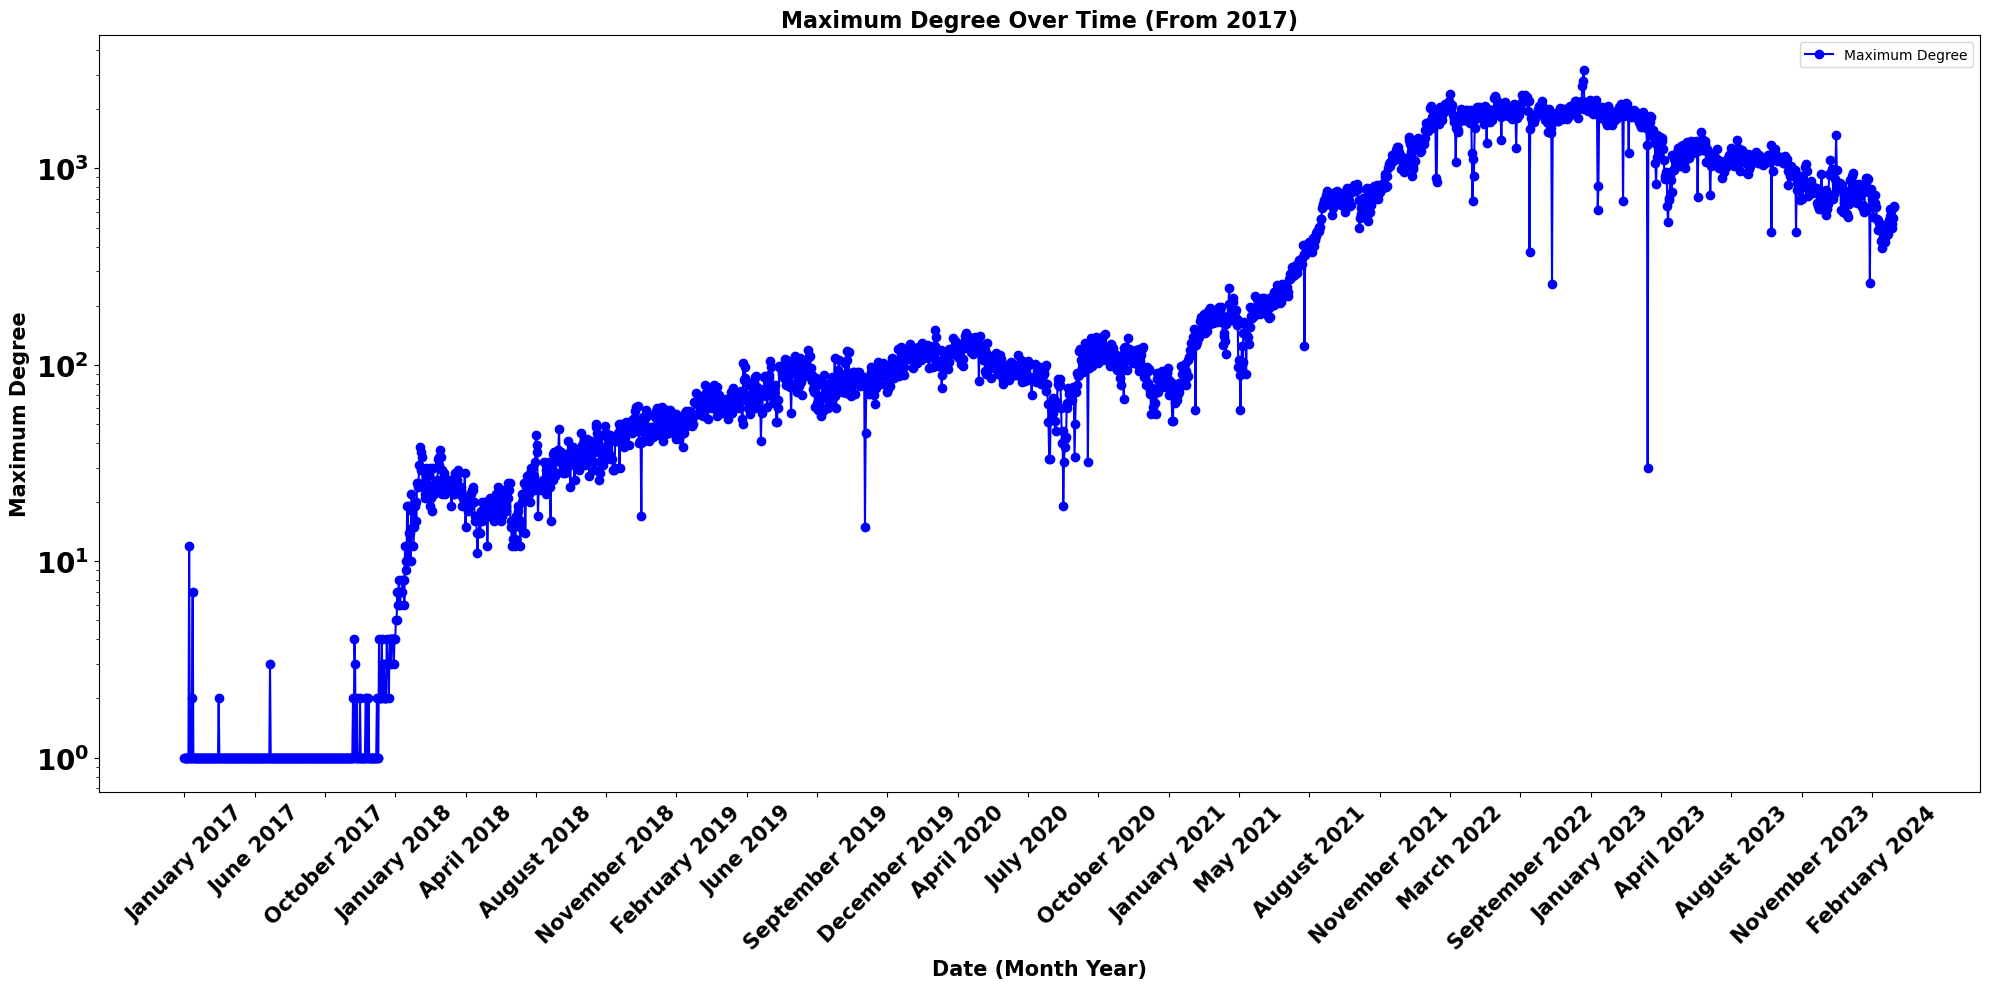

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file for maximum degree
file_path = '/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/max_degrees_per_day_2017.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Convert the 'Date' column to datetime format for proper handling
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter for dates from January 1, 2017, onwards
df_filtered = df[df['Date'] >= '2017-01-01']

# Calculate the total maximum degree from the filtered DataFrame
total_max_degree_2017 = df_filtered['Maximum Degree'].sum()
print(f"Total Maximum Degree from 2017-01-01: {total_max_degree_2017}")

# Sort data by the 'Date' column
df_filtered.sort_values(by='Date', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df_filtered))  # Index based on the length of the filtered data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df_filtered['Maximum Degree'].values, marker='o', linestyle='-', color='b', label='Maximum Degree')

# Set x-axis labels every 10 days (adjust as needed)
step_size = 100  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df_filtered), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df_filtered['Date'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=15,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(fontweight='bold', fontsize=20)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=15, fontweight='bold')
plt.ylabel('Maximum Degree', fontsize=15, fontweight='bold')
plt.title('Maximum Degree Over Time (From 2017)', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic if needed
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


### Totel Token Vs Node

In [5]:
import json
import csv

# Define the input and output file paths
input_file = '/home/prio/loc_project/Mini_2_ERC_721/total_hypergraph_2017_2024.json'
output_file = '/home/prio/loc_project/Mini_2_ERC_721/total_hypergraph_token_number_of_nodes_2017.csv'

# Load the JSON data
with open(input_file, 'r') as file:
    data = json.load(file)

# Prepare to write the CSV file
with open(output_file, 'w', newline='') as csvfile:
    fieldnames = ['Token', 'No. Of Nodes']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write each token and its number of nodes
    for token, nodes in data.items():
        writer.writerow({'Token': token, 'No. Of Nodes': len(nodes)})

print(f"Data successfully written to {output_file}")


Data successfully written to /home/prio/loc_project/Mini_2_ERC_721/total_hypergraph_token_number_of_nodes_2017.csv


### To contact and Is Contract

In [8]:
import pandas as pd
import glob
import os

# Directory containing CSV files
input_folder = '/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024/'

# Pattern to match all CSV files
file_pattern = f'{input_folder}*.csv'

# Lists to collect DataFrames
list_df_from = []
list_df_to = []

# Iterate over each CSV file
for file_path in glob.glob(file_pattern):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Create the first DataFrame with 'fromLabel' and 'fromIsContract'
    df_from = df[['fromLabel', 'fromIsContract']]
    
    # Create the second DataFrame with 'toLabel' and 'toIsContract'
    df_to = df[['toLabel', 'toIsContract']]
    
    # Append the DataFrames to the lists
    list_df_from.append(df_from)
    list_df_to.append(df_to)

# Concatenate all DataFrames into single DataFrames
df_from_combined = pd.concat(list_df_from, ignore_index=True)
df_to_combined = pd.concat(list_df_to, ignore_index=True)

# Display the combined DataFrames
print("Combined 'from' DataFrame:")
print(df_from_combined)

print("\nCombined 'to' DataFrame:")
print(df_to_combined)


Combined 'from' DataFrame:
           fromLabel  fromIsContract
0             467327             0.0
1             483129             0.0
2                  3             0.0
3             369959             1.0
4                  3             0.0
...              ...             ...
190081557    7035144             0.0
190081558    2758963             0.0
190081559    1438127             0.0
190081560    6761748             1.0
190081561    7362876             0.0

[190081562 rows x 2 columns]

Combined 'to' DataFrame:
           toLabel  toIsContract
0           466558           0.0
1           483132           0.0
2           369959           1.0
3           369961           1.0
4           483133           0.0
...            ...           ...
190081557  6661463           0.0
190081558  5417649           0.0
190081559  6761748           1.0
190081560  5379535           0.0
190081561   931307           0.0

[190081562 rows x 2 columns]


In [9]:
df_from_sorted = df_from_combined.sort_values(by='fromLabel')  
df_to_sorted = df_to_combined.sort_values(by='toLabel')      


In [10]:
df_fromm = df_from_sorted.drop_duplicates()
df_too = df_to_sorted.drop_duplicates()

In [11]:
# Create 'label' column in df_fromm and df_too
# Concatenate 'fromLabel' and 'toLabel' appropriately
df_fromm['label'] = df_fromm['fromLabel'].astype(str)  # Use only 'fromLabel' for df_fromm
df_too['label'] = df_too['toLabel'].astype(str)        # Use only 'toLabel' for df_too

# Create smart and nonsmart DataFrames from df_fromm
df_from_smart = df_fromm[df_fromm['fromIsContract'] == 1.0][['label']]
df_from_nonsmart = df_fromm[df_fromm['fromIsContract'] == 0.0][['label']]

# Create smart and nonsmart DataFrames from df_too
df_to_smart = df_too[df_too['toIsContract'] == 1.0][['label']]
df_to_nonsmart = df_too[df_too['toIsContract'] == 0.0][['label']]

# Merge smart and nonsmart DataFrames
df_smart_combined = pd.concat([df_from_smart, df_to_smart], ignore_index=True)
df_nonsmart_combined = pd.concat([df_from_nonsmart, df_to_nonsmart], ignore_index=True)

# Remove duplicates from the combined DataFrames
df_smart_combined_unique = df_smart_combined.drop_duplicates()
df_nonsmart_combined_unique = df_nonsmart_combined.drop_duplicates()

# Display the combined and deduplicated DataFrames
print("Combined and deduplicated 'smart' DataFrame:")
print(df_smart_combined_unique)

print("\nCombined and deduplicated 'nonsmart' DataFrame:")
print(df_nonsmart_combined_unique)

/tmp/ipykernel_92726/384446702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fromm['label'] = df_fromm['fromLabel'].astype(str)  # Use only 'fromLabel' for df_fromm
/tmp/ipykernel_92726/384446702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_too['label'] = df_too['toLabel'].astype(str)        # Use only 'toLabel' for df_too


Combined and deduplicated 'smart' DataFrame:
          label
0             2
1             4
2             5
3             7
4             8
...         ...
510269  7831661
510270  7831669
510271  7831735
510272  7831739
510273  7832117

[289891 rows x 1 columns]

Combined and deduplicated 'nonsmart' DataFrame:
            label
0               1
1               2
2               3
3               4
4               5
...           ...
10631308  7832116
10631309  7832118
10631310  7832119
10631311  7832120
10631312  7832121

[7550045 rows x 1 columns]


In [12]:
import pandas as pd

# Assuming df_smart_combined_unique and df_nonsmart_combined_unique are already defined
# Extract the 'label' columns
labels_smart = df_smart_combined_unique['label']
labels_nonsmart = df_nonsmart_combined_unique['label']

# Find the intersection of the labels
intersection_labels = pd.Series(list(set(labels_smart).intersection(set(labels_nonsmart))))

# Create a DataFrame with the intersecting labels
df_intersection = pd.DataFrame(intersection_labels, columns=['label'])

# Display the DataFrame with intersecting labels
print("Intersection of 'smart' and 'nonsmart' labels:")
print(df_intersection)



Intersection of 'smart' and 'nonsmart' labels:
        label
0     7373474
1     7733771
2     7596891
3     7500747
4     7518994
...       ...
7816  7423715
7817   184988
7818  7535203
7819  7529070
7820  7325569

[7821 rows x 1 columns]


In [13]:
num_rows = df_intersection.shape[0]
print(f"Number of rows in both: {num_rows}")

num_rows = df_smart_combined_unique.shape[0]
print(f"Number of Smart: {num_rows}")

num_rows = df_nonsmart_combined_unique.shape[0]
print(f"Number of Non Smart: {num_rows}")

Number of rows in both: 7821
Number of Smart: 289891
Number of Non Smart: 7550045


### No.of Nodes_2017

Total Number of Unique Nodes from 2017-01-01: 53235282


/tmp/ipykernel_93485/3944121350.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by='Day', inplace=True)


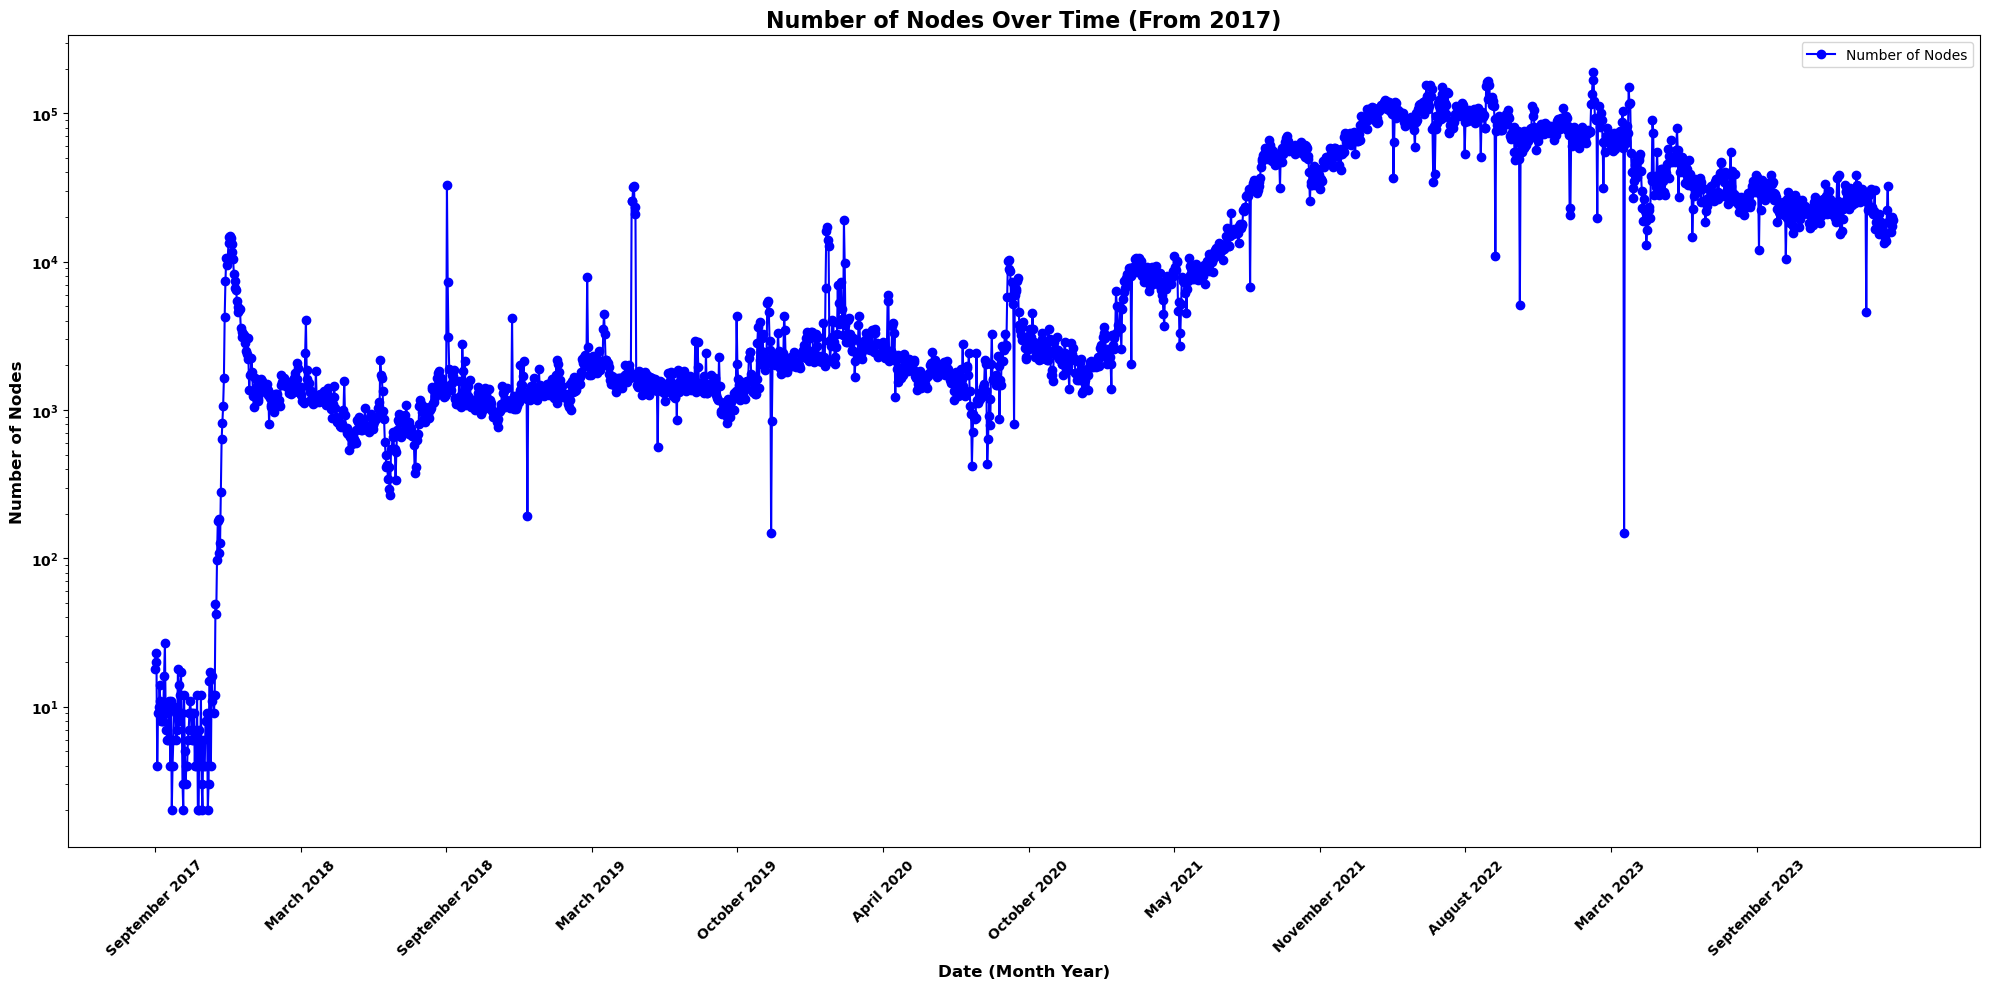

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/num_nodes_per_day.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Filter for dates from January 1, 2017, onwards
df_filtered = df[df['Day'] >= '2017-09-01']

# Calculate the total number of unique nodes from the filtered DataFrame
total_nodes_2017 = df_filtered['Number of Nodes'].sum()
print(f"Total Number of Unique Nodes from 2017-01-01: {total_nodes_2017}")

# Sort data by the 'Day' column
df_filtered.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df_filtered))  # Index based on the length of the filtered data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df_filtered['Number of Nodes'].values, marker='o', linestyle='-', color='b', label='Number of Nodes')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df_filtered), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df_filtered['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Nodes', fontsize=12, fontweight='bold')
plt.title('Number of Nodes Over Time (From 2017)', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Define the input directory for labeled files and output file for storing data
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024'
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/node_results.csv'  # CSV file to save the calculated data

# Initialize lists to store the number of nodes and the number of new nodes for each day
num_nodes_per_day = []
new_nodes_per_day = []

# Initialize a set to keep track of all nodes encountered so far
cumulative_nodes = set()

# Process each CSV file in the labeled directory
total_files = len([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])
for idx, filename in enumerate(sorted(os.listdir(labeled_dir))):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        df = pd.read_csv(file_path)
        
        # Initialize a dictionary to store the hyperedges for the current day
        hyperedges = {}
        
        # Group by 'tokenAddressLabel' to create hyperedges
        for token, group in df.groupby('tokenAddressLabel'):
            hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
        
        # Create the hypergraph for the current day
        H = hnx.Hypergraph(hyperedges)
        
        # Get the number of nodes in the current hypergraph
        num_nodes = len(H.nodes)
        edge_name = filename.replace('.csv', '')
        num_nodes_per_day.append((edge_name, num_nodes))
        
        # Initialize a set to store nodes for the current day
        current_day_nodes = set(df['fromLabel']).union(set(df['toLabel']))
        
        # Calculate new nodes by finding the difference between current day's nodes and cumulative nodes
        new_nodes = current_day_nodes - cumulative_nodes
        
        # Add the new nodes to the cumulative set
        cumulative_nodes.update(current_day_nodes)
        
        # Count the number of new nodes
        num_new_nodes = len(new_nodes)
        new_nodes_per_day.append((edge_name, num_new_nodes))
        
        # Print progress
        print(f"Processed {idx + 1}/{total_files} files: {edge_name} with {num_nodes} nodes, {num_new_nodes} new nodes")

# Save the calculated data to a CSV file
df_results = pd.DataFrame({
    'Day': [day for day, _ in num_nodes_per_day],
    'Number_of_Nodes': [nodes for _, nodes in num_nodes_per_day],
    'New_Nodes': [nodes for _, nodes in new_nodes_per_day]
})
df_results.to_csv(output_file, index=False)

# Load the data for plotting (useful for later without recalculating)
df_loaded = pd.read_csv(output_file)
days = df_loaded['Day']
num_nodes = df_loaded['Number_of_Nodes']
num_new_nodes = df_loaded['New_Nodes']

# Plot the number of nodes and new nodes over time in subplots


Processed 1/2433 files: 2017-01-07 with 3 nodes, 3 new nodes
Processed 2/2433 files: 2017-01-09 with 2 nodes, 2 new nodes
Processed 3/2433 files: 2017-01-11 with 3 nodes, 2 new nodes
Processed 4/2433 files: 2017-01-16 with 2 nodes, 1 new nodes
Processed 5/2433 files: 2017-01-24 with 3 nodes, 1 new nodes
Processed 6/2433 files: 2017-02-06 with 4 nodes, 2 new nodes
Processed 7/2433 files: 2017-02-28 with 4 nodes, 4 new nodes
Processed 8/2433 files: 2017-03-01 with 5 nodes, 4 new nodes
Processed 9/2433 files: 2017-03-02 with 8 nodes, 6 new nodes
Processed 10/2433 files: 2017-03-03 with 3 nodes, 2 new nodes
Processed 11/2433 files: 2017-03-04 with 4 nodes, 3 new nodes
Processed 12/2433 files: 2017-03-05 with 6 nodes, 2 new nodes
Processed 13/2433 files: 2017-03-06 with 18 nodes, 2 new nodes
Processed 14/2433 files: 2017-03-07 with 8 nodes, 6 new nodes
Processed 15/2433 files: 2017-03-08 with 3 nodes, 2 new nodes
Processed 16/2433 files: 2017-03-09 with 5 nodes, 2 new nodes
Processed 17/243

Total Number of Unique Nodes: 7832122


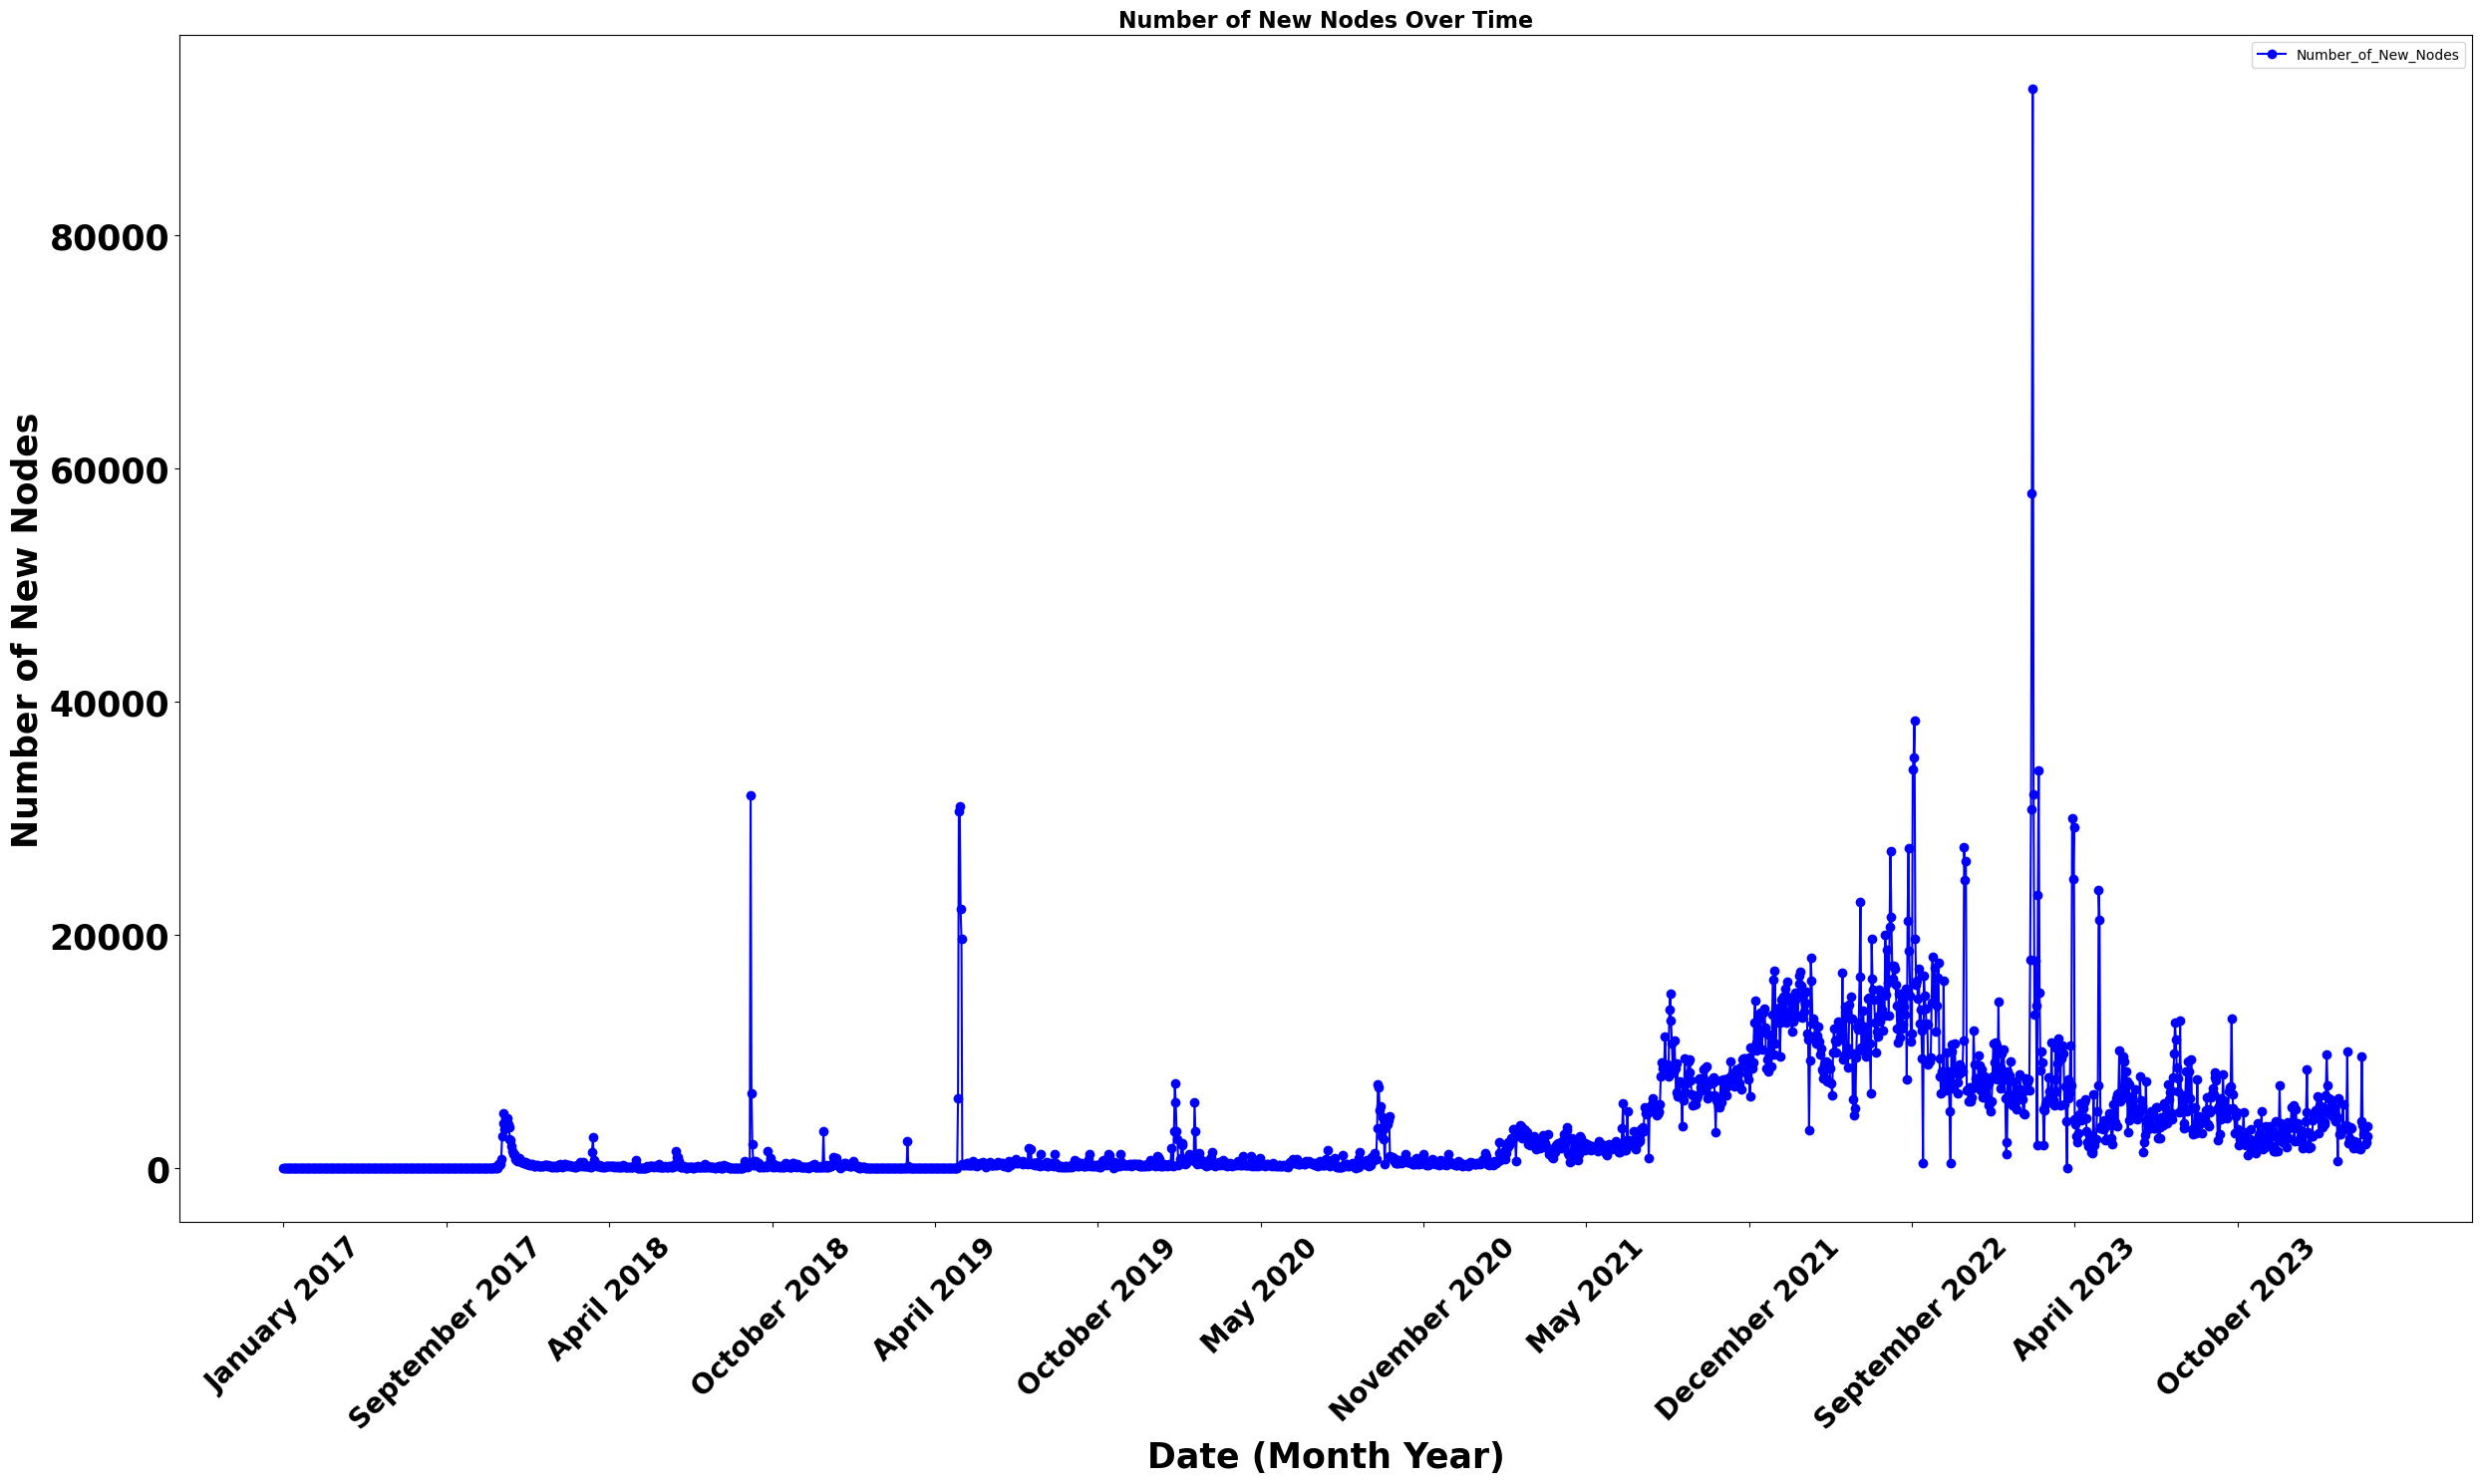

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/new_nodes.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate the total number of unique nodes (total new nodes)
total_unique_nodes = df['Number_of_New_Nodes'].sum()
print(f"Total Number of Unique Nodes: {total_unique_nodes}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(25, 15))  # Set figure size
plt.plot(days_index, df['Number_of_New_Nodes'].values, marker='o', linestyle='-', color='b', label='Number_of_New_Nodes')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=20,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold',
    fontsize=25
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=25, fontweight='bold')
plt.ylabel('Number of New Nodes', fontsize=25, fontweight='bold')
plt.title('Number of New Nodes Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
# plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Total Number of Unique Nodes: 7832122


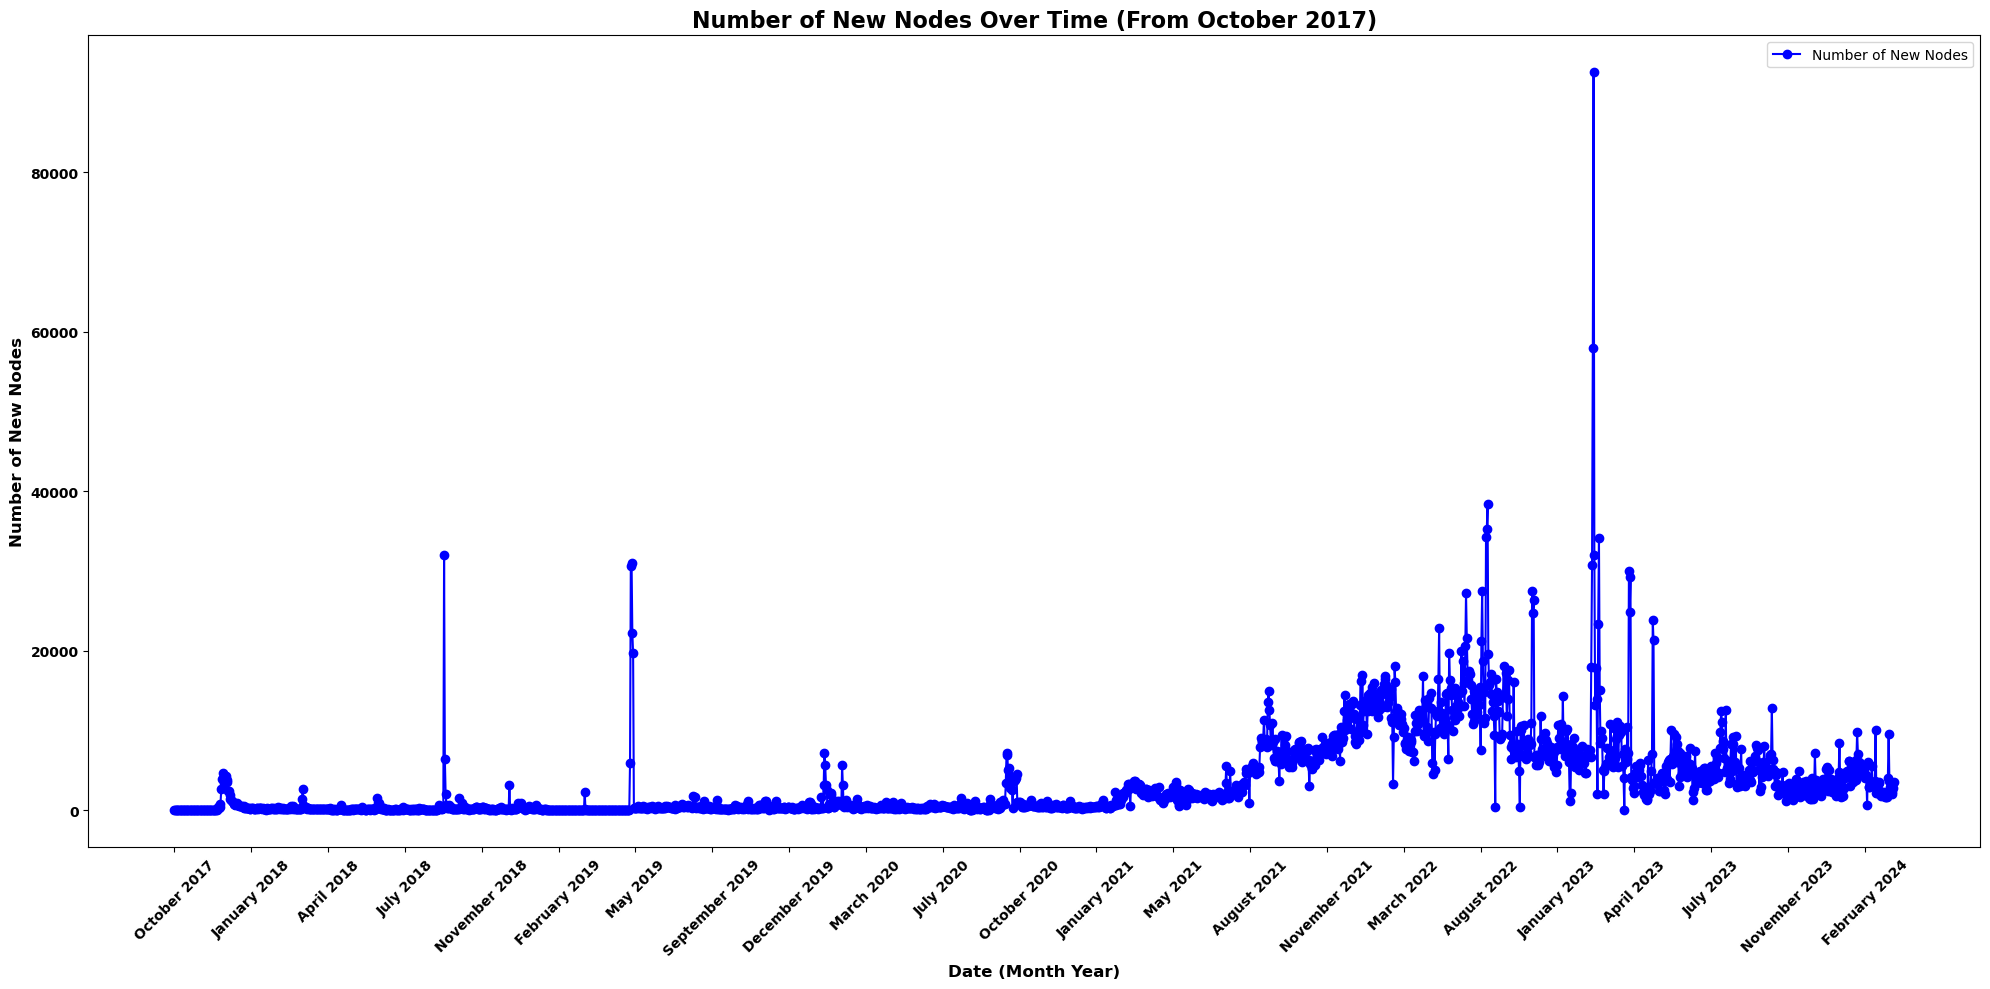

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/new_nodes.csv'
df = pd.read_csv(file_path)

# Calculate the total number of unique nodes (total new nodes)
total_unique_nodes = df['Number_of_New_Nodes'].sum()
print(f"Total Number of Unique Nodes: {total_unique_nodes}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Filter data to only include entries from October 1, 2017, onward
filtered_df = df[df['Day'] >= '2017-10-01']

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(filtered_df))

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, filtered_df['Number_of_New_Nodes'].values, marker='o', linestyle='-', color='b', label='Number of New Nodes')

# Set x-axis labels
plt.xticks(
    ticks=days_index[::100],  # Show every 10th day for clarity
    labels=filtered_df['Day'].dt.strftime('%B %Y').iloc[::100],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of New Nodes', fontsize=12, fontweight='bold')
plt.title('Number of New Nodes Over Time (From October 2017)', fontsize=16, fontweight='bold')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


### No.of Edges

Index(['Day', 'Number of Transactions'], dtype='object')
Total Number of Transactions (Edges): 190080636


/tmp/ipykernel_5081/905824452.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by='Day', inplace=True)


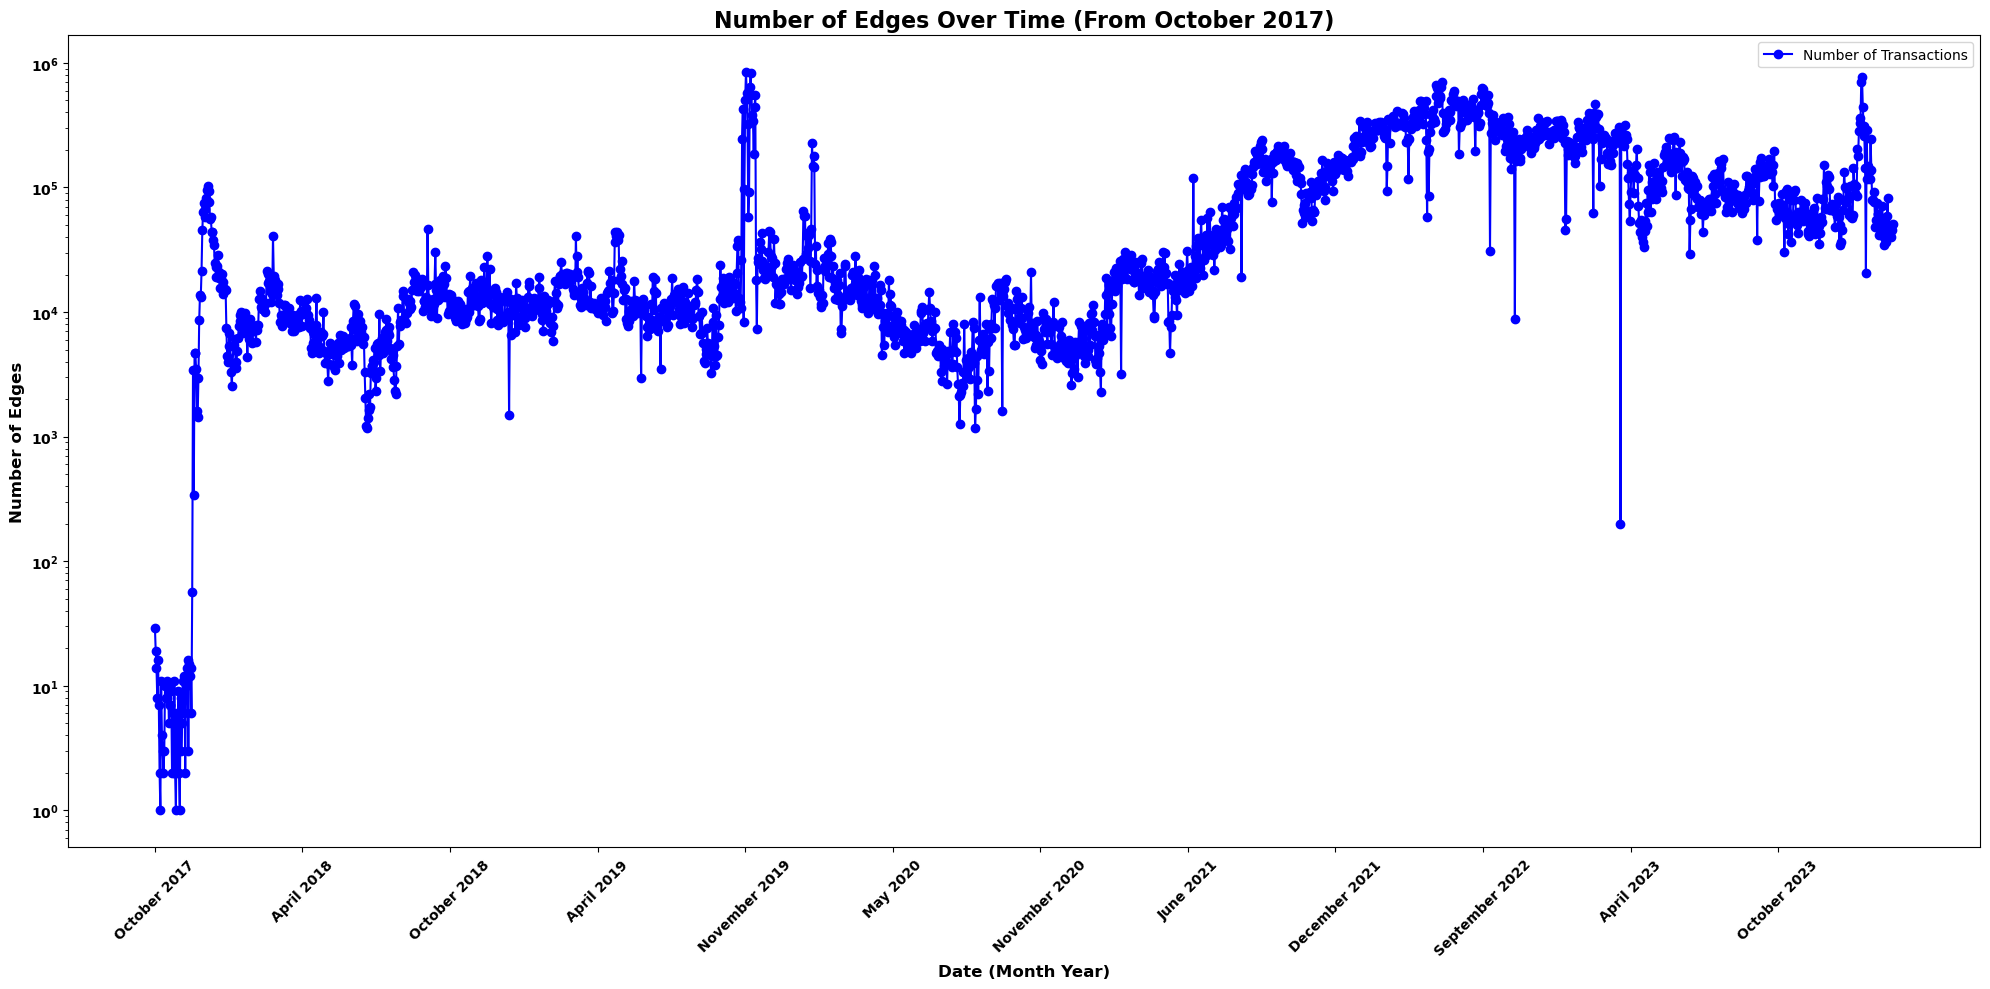

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/transactions(edges)_day.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
total_edges_column_name = 'Number of Transactions'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Transactions (Edges): {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Filter the DataFrame to only include dates from 2017-10-01 onward
start_date = '2017-10-01'
df_filtered = df[df['Day'] >= start_date]

# Sort the filtered data by the 'Day' column
df_filtered.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df_filtered))  # Index based on the length of the filtered data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df_filtered[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of Transactions')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df_filtered), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df_filtered['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Edges', fontsize=12, fontweight='bold')
plt.title('Number of Edges Over Time (From October 2017)', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Number of new edges added on
2017-01-07: 2
Progress: 1/2433 files processed
2017-01-09: 1
Progress: 2/2433 files processed
2017-01-11: 2
Progress: 3/2433 files processed
2017-01-16: 1
Progress: 4/2433 files processed
2017-01-24: 1
Progress: 5/2433 files processed
2017-02-06: 3
Progress: 6/2433 files processed
2017-02-28: 3
Progress: 7/2433 files processed
2017-03-01: 5
Progress: 8/2433 files processed
2017-03-02: 6
Progress: 9/2433 files processed
2017-03-03: 3
Progress: 10/2433 files processed
2017-03-04: 3
Progress: 11/2433 files processed
2017-03-05: 3
Progress: 12/2433 files processed
2017-03-06: 14
Progress: 13/2433 files processed
2017-03-07: 7
Progress: 14/2433 files processed
2017-03-08: 2
Progress: 15/2433 files processed
2017-03-09: 4
Progress: 16/2433 files processed
2017-03-10: 3
Progress: 17/2433 files processed
2017-03-11: 7
Progress: 18/2433 files processed
2017-03-12: 3
Progress: 19/2433 files processed
2017-03-13: 3
Progress: 20/2433 files processed
2017-03-14: 1
Progr

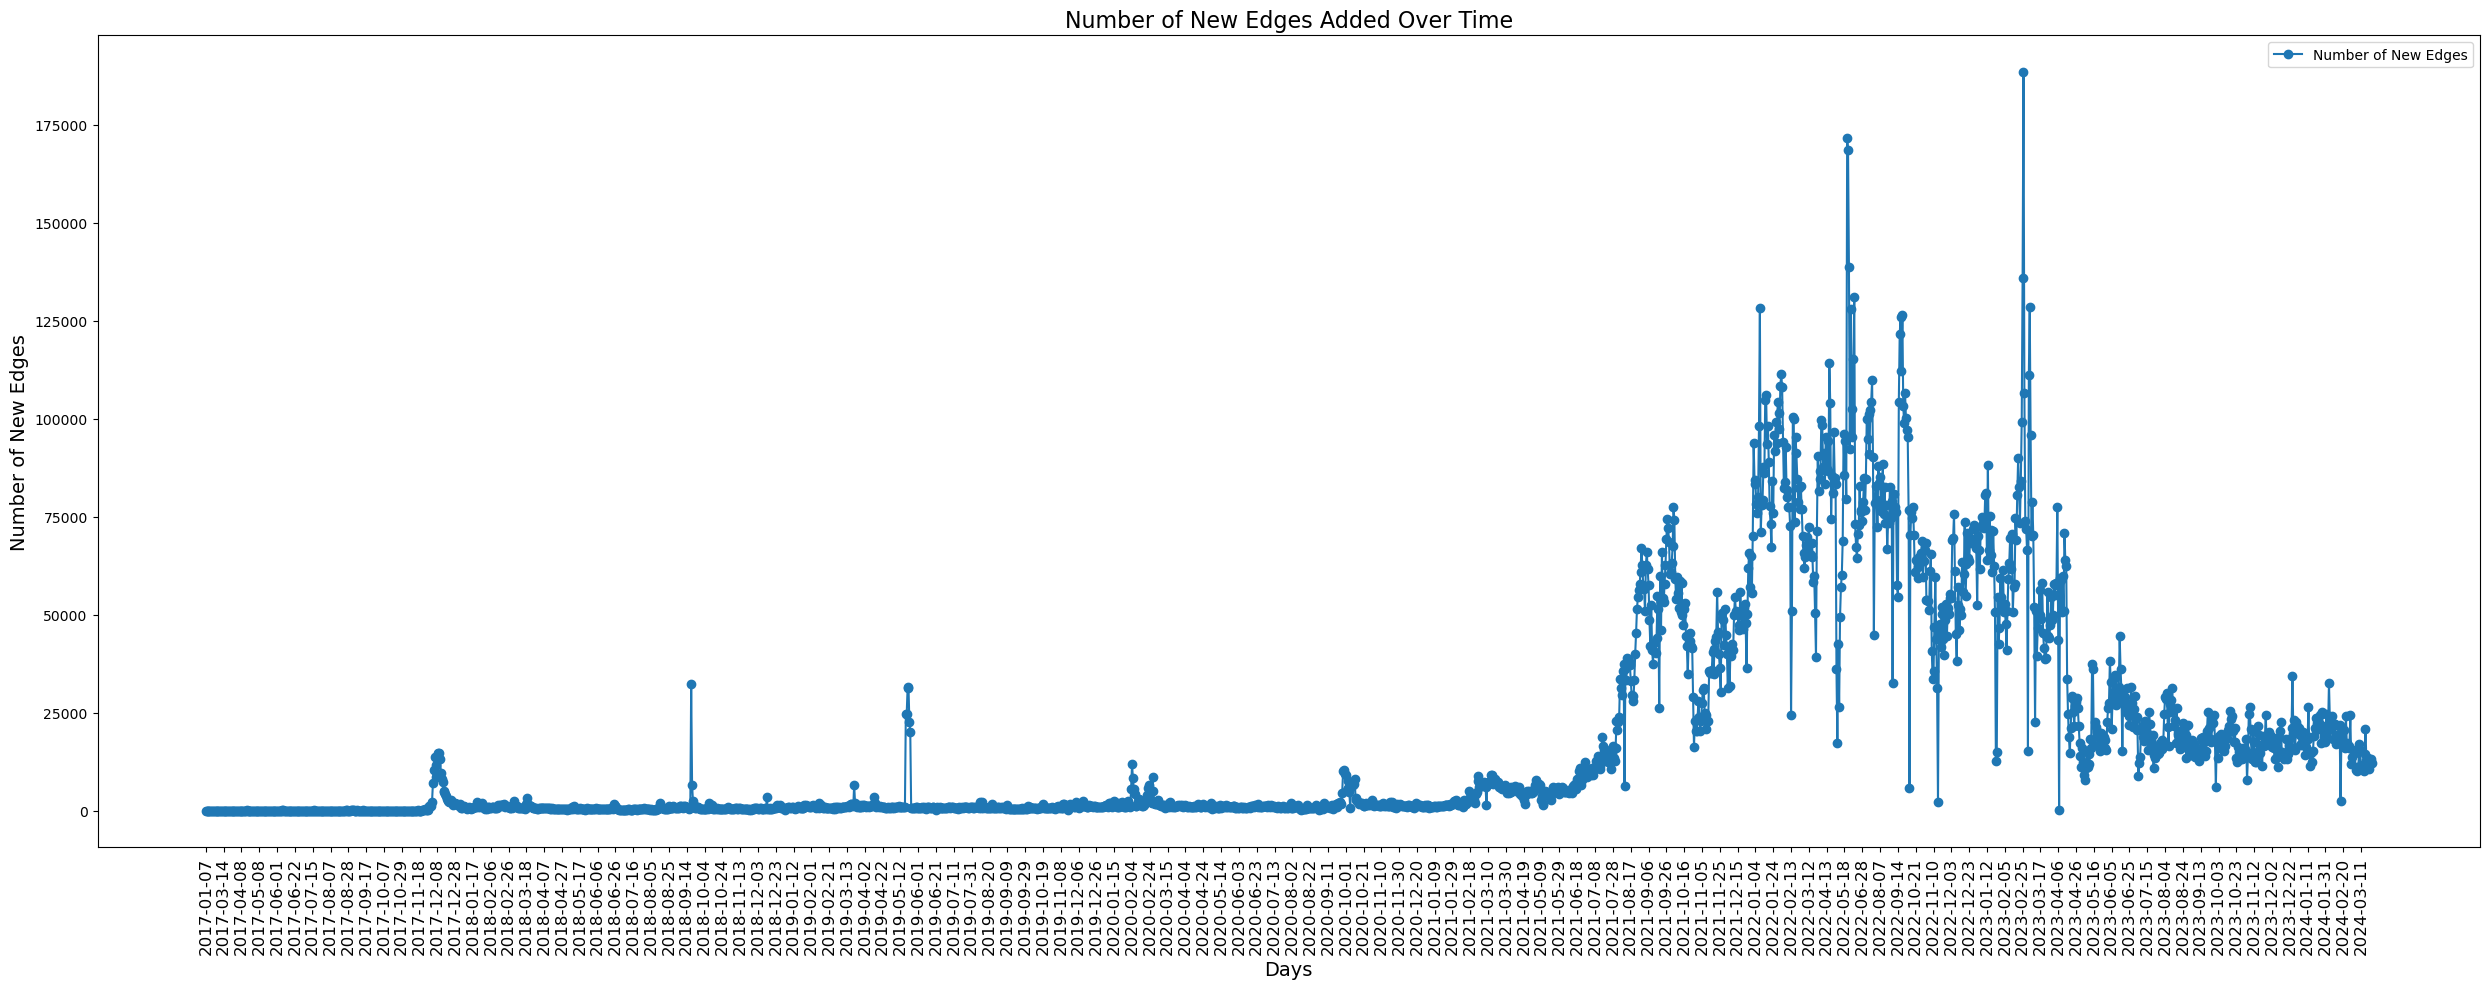

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out_2017_2024'

# Initialize a set to store all edges seen so far and a list for new edges per day
all_edges = set()
new_edges_per_day = []

print("Number of new edges added on")

# Process each CSV file in the labeled directory
for i, filename in enumerate(sorted(os.listdir(labeled_dir)), start=1):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Create a set of edges (transactions) for the current day
        current_edges = set(zip(df['fromLabel'], df['toLabel']))
        
        # Calculate the new edges added on this day
        new_edges = current_edges - all_edges
        num_new_edges = len(new_edges)
        day_name = filename.replace('.csv', '')
        new_edges_per_day.append((day_name, num_new_edges))
        
        # Update the set of all edges seen so far
        all_edges.update(new_edges)
        
        # Print the number of new edges for the current day
        print(f"{day_name}: {num_new_edges}")
        
        # Print the progress
        print(f"Progress: {i}/{len(os.listdir(labeled_dir))} files processed")

# Sort the number of new edges by day name
new_edges_per_day.sort()

# Save the data to a CSV file
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/new_edges_normal.csv'
edges_df = pd.DataFrame(new_edges_per_day, columns=['Day', 'Number of New Edges'])
edges_df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")

# Extract the days and corresponding number of new edges
days = edges_df['Day'].tolist()
num_new_edges = edges_df['Number of New Edges'].tolist()

# Plot the number of new edges over time with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_edges, marker='o', linestyle='-', color='#1f77b4', label='Number of New Edges')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Edges', fontsize=14)
plt.title('Number of New Edges Added Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(False)

# Add a legend
plt.legend()

# Display the plot
plt.show()


Index(['Day', 'Number of New Edges'], dtype='object')
Total Number of Transactions(Edges): 41486572


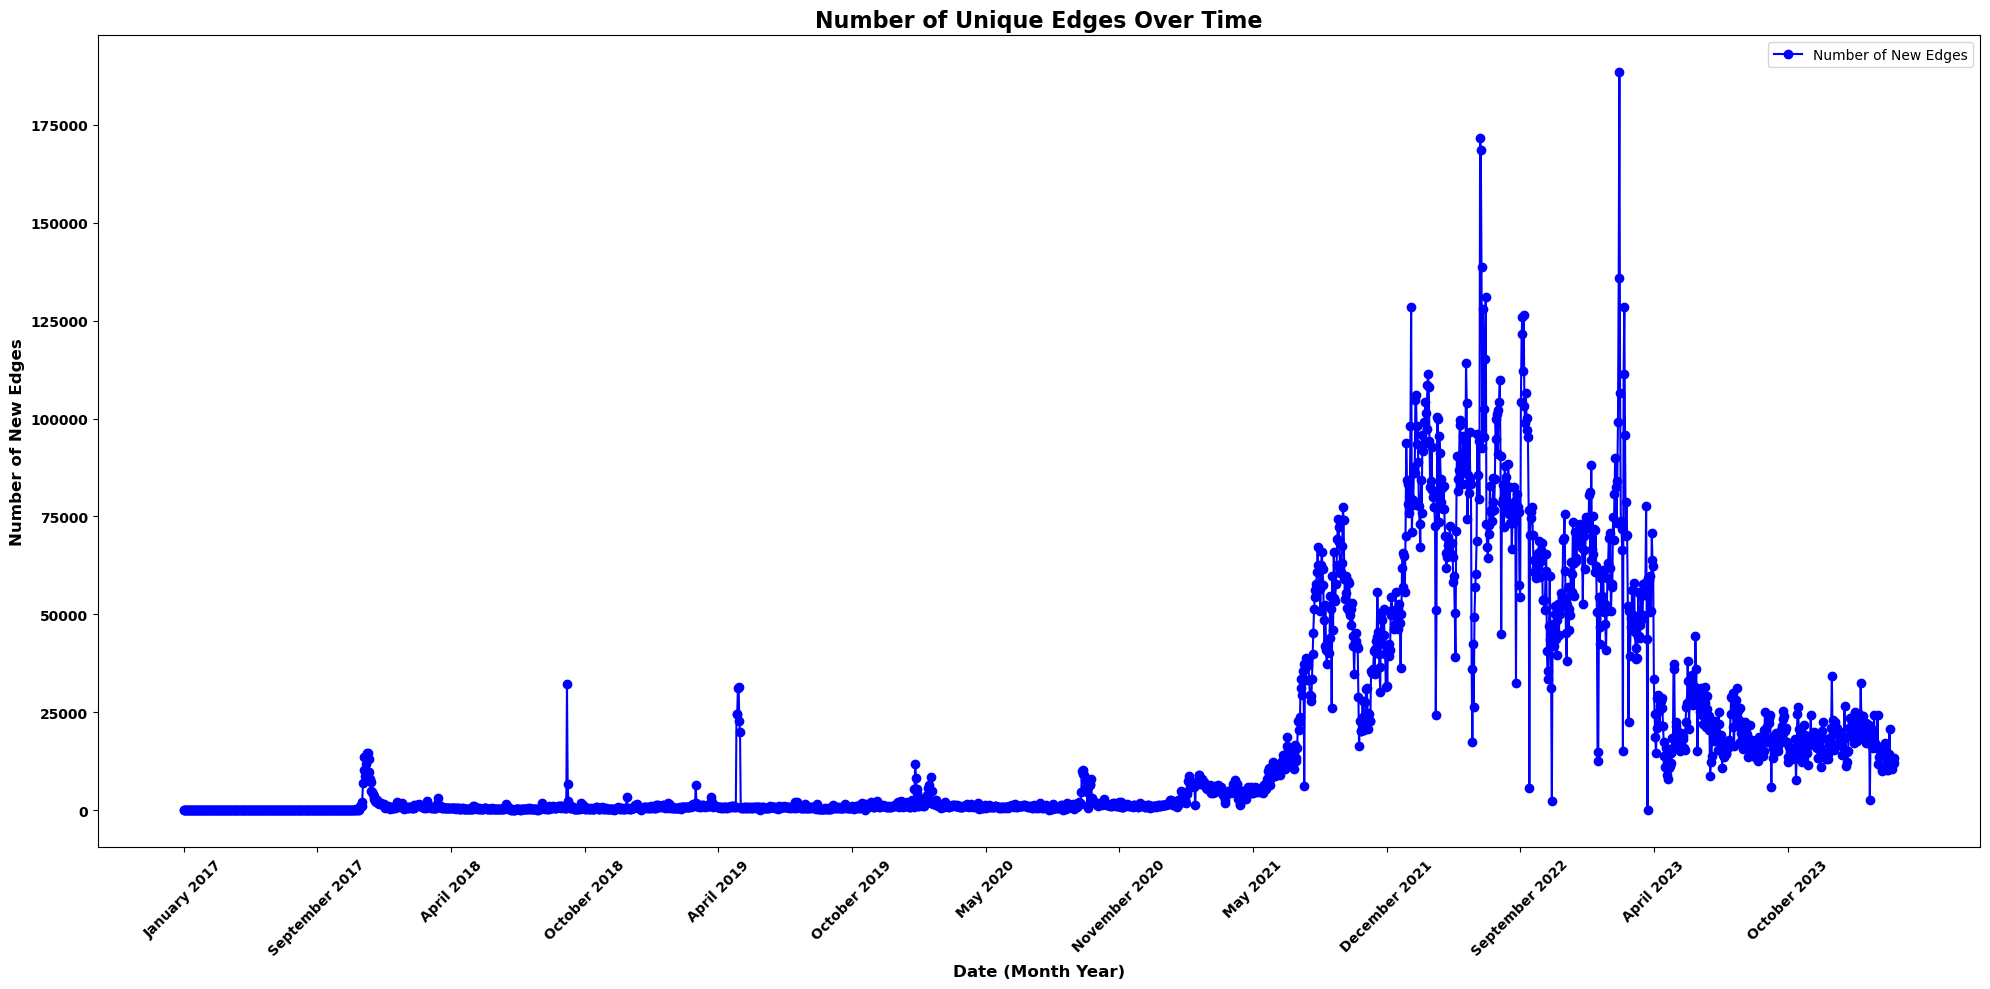

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/new_edges_normal.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
# Replace 'Number of Tranactions' with the correct column name if different
total_edges_column_name = 'Number of New Edges'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Transactions(Edges): {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of New Edges')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold'
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of New Edges', fontsize=12, fontweight='bold')
plt.title('Number of Unique Edges Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
# plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Column names in the DataFrame: ['Day', 'Number of New Edges']
Total Number of Transactions(Edges): 41486572


/tmp/ipykernel_5081/2827783151.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by='Day', inplace=True)


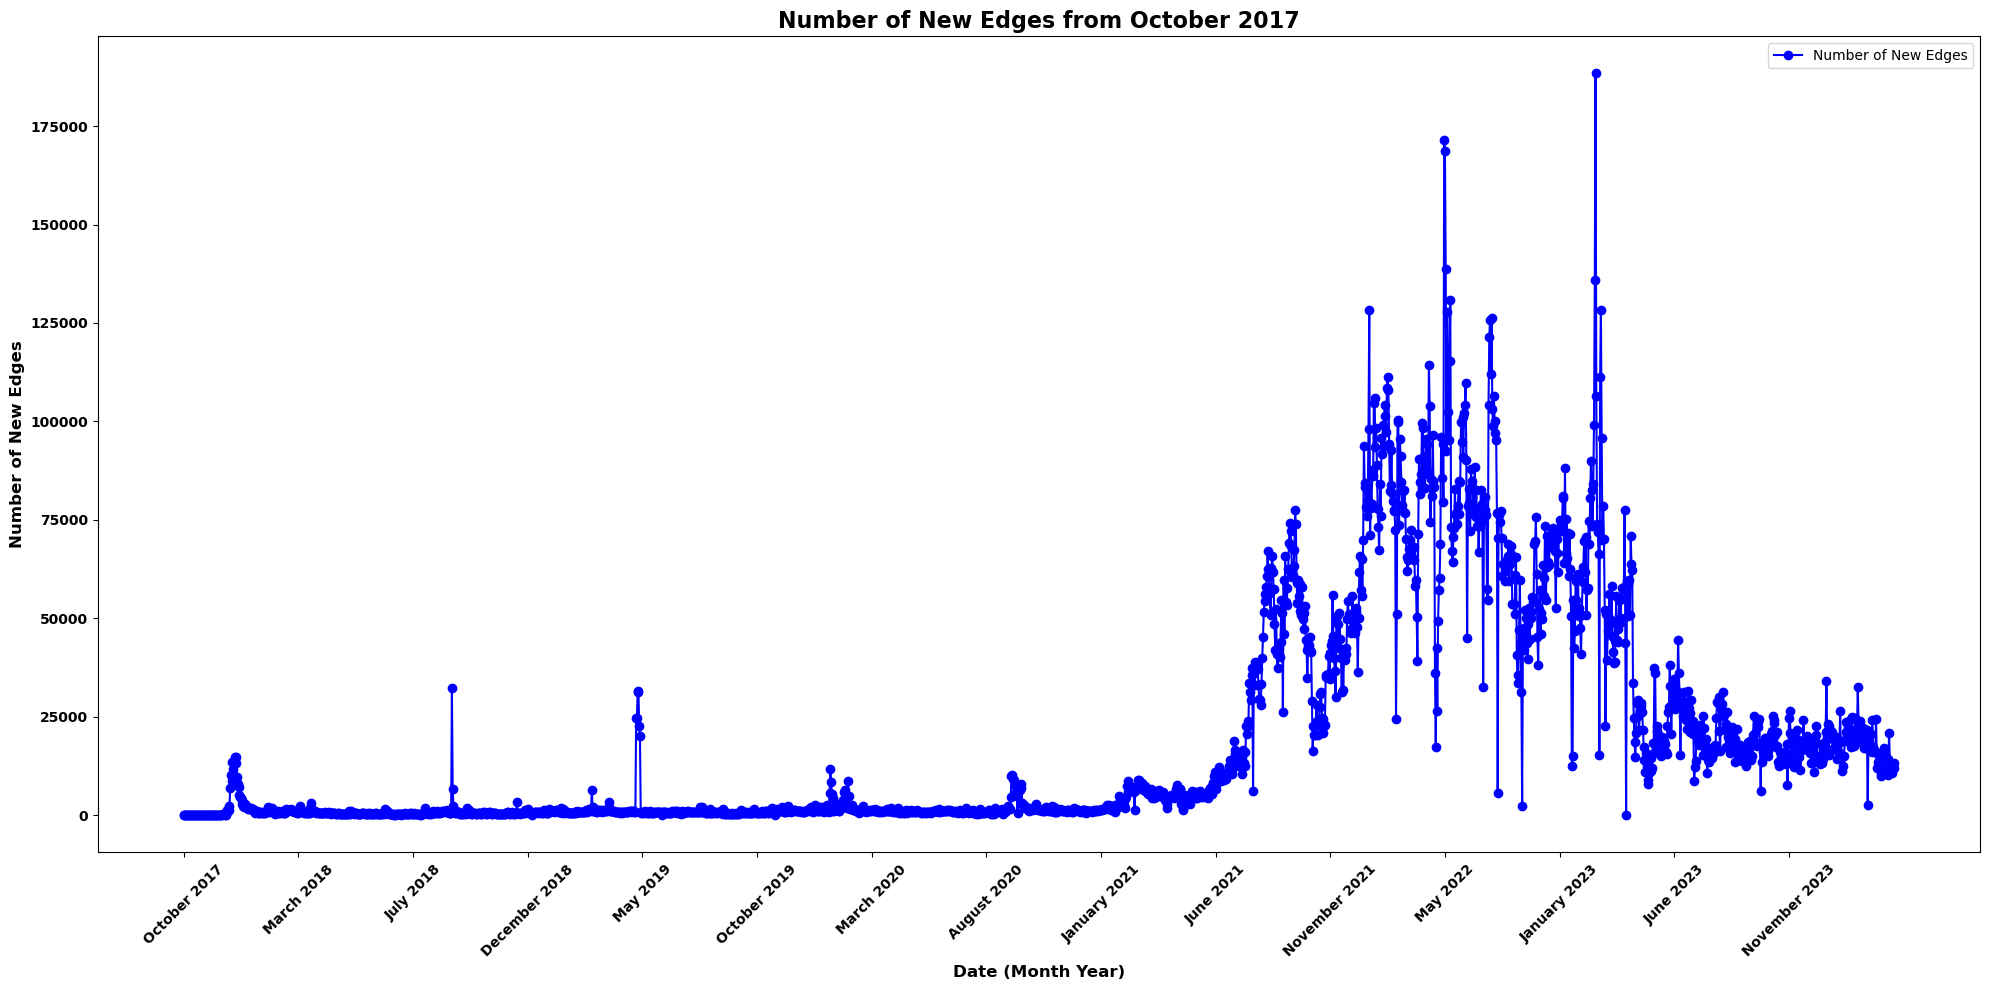

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/new_edges_normal.csv'
df = pd.read_csv(file_path)

# Print column names to verify
print("Column names in the DataFrame:", df.columns.tolist())

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Update the column name based on the actual name from the printed output
total_edges_column_name = 'Number of New Edges'  # Change this if necessary

# Verify if the column exists
if total_edges_column_name not in df.columns:
    raise ValueError(f"Column '{total_edges_column_name}' not found in the DataFrame.")

total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Transactions(Edges): {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Filter the DataFrame to include only dates from October 2017 onward
start_date = '2017-10-01'
df_filtered = df[df['Day'] >= start_date]

# Sort data by the 'Day' column
df_filtered.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df_filtered))

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df_filtered[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of New Edges')

# Set x-axis labels every 190 days
step_size = 150  # Adjust step size if necessary
selected_indices = list(range(0, len(df_filtered), step_size))

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df_filtered['Day'].dt.strftime('%B %Y').iloc[selected_indices],
    rotation=45,
    fontsize=10,
    fontweight='bold'
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of New Edges', fontsize=12, fontweight='bold')
plt.title('Number of New Edges from October 2017', fontsize=16, fontweight='bold')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


### No.of Tokens_2017

Index(['Day', 'Number of Hyperedges'], dtype='object')
Total Number of Hyperedges: 3408594


/tmp/ipykernel_5081/3733913823.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by='Day', inplace=True)


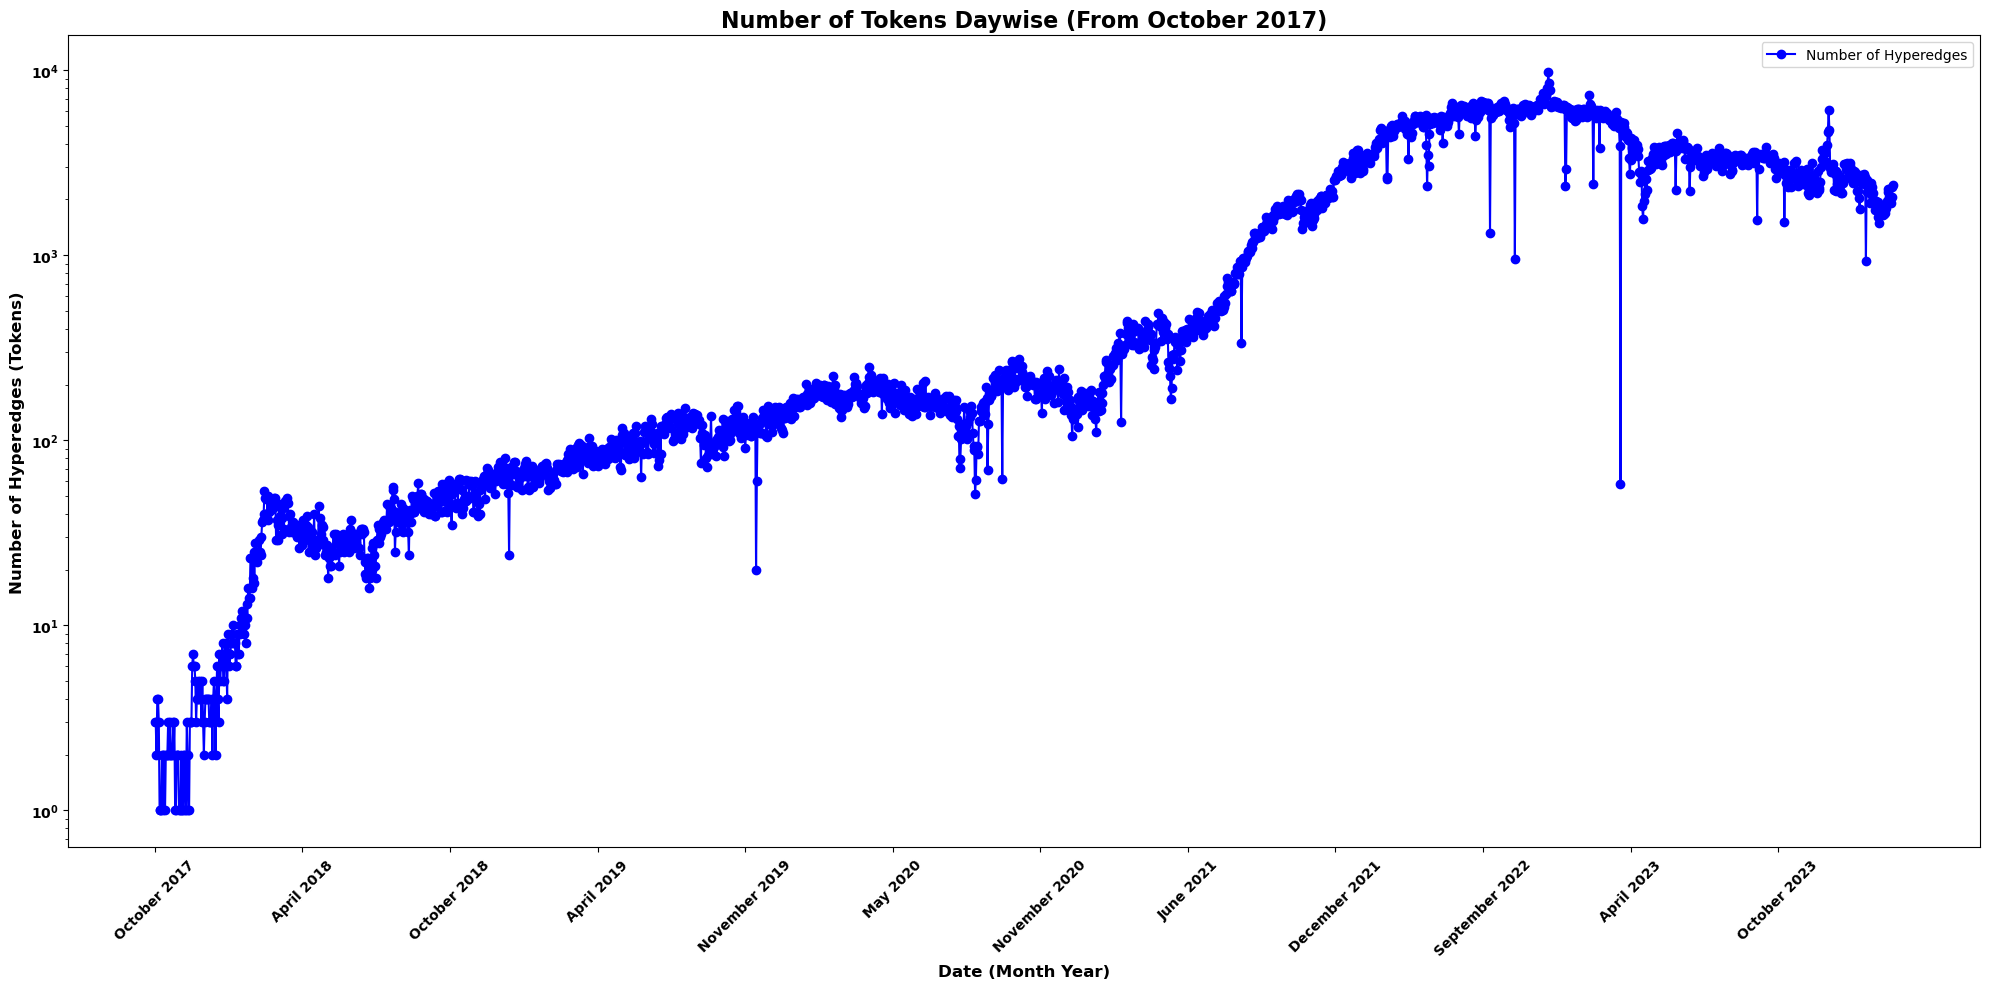

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/num_tokens_per_day.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Print column names to verify
print(df.columns)

# Assuming the column name is correct
total_edges_column_name = 'Number of Hyperedges'  # Update this if the column name is different
total_edges = df[total_edges_column_name].sum()
print(f"Total Number of Hyperedges: {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Filter the DataFrame to only include dates from 2017-10-01 onward
start_date = '2017-10-01'
df_filtered = df[df['Day'] >= start_date]

# Sort the filtered data by the 'Day' column
df_filtered.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df_filtered))  # Index based on the length of the filtered data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df_filtered[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='Number of Hyperedges')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df_filtered), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df_filtered['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Hyperedges (Tokens)', fontsize=12, fontweight='bold')
plt.title('Number of Tokens Daywise (From October 2017)', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


### New Tokens_2017

Column names in the DataFrame: ['Date', 'New Edges Added']
New Edges Added: 213207


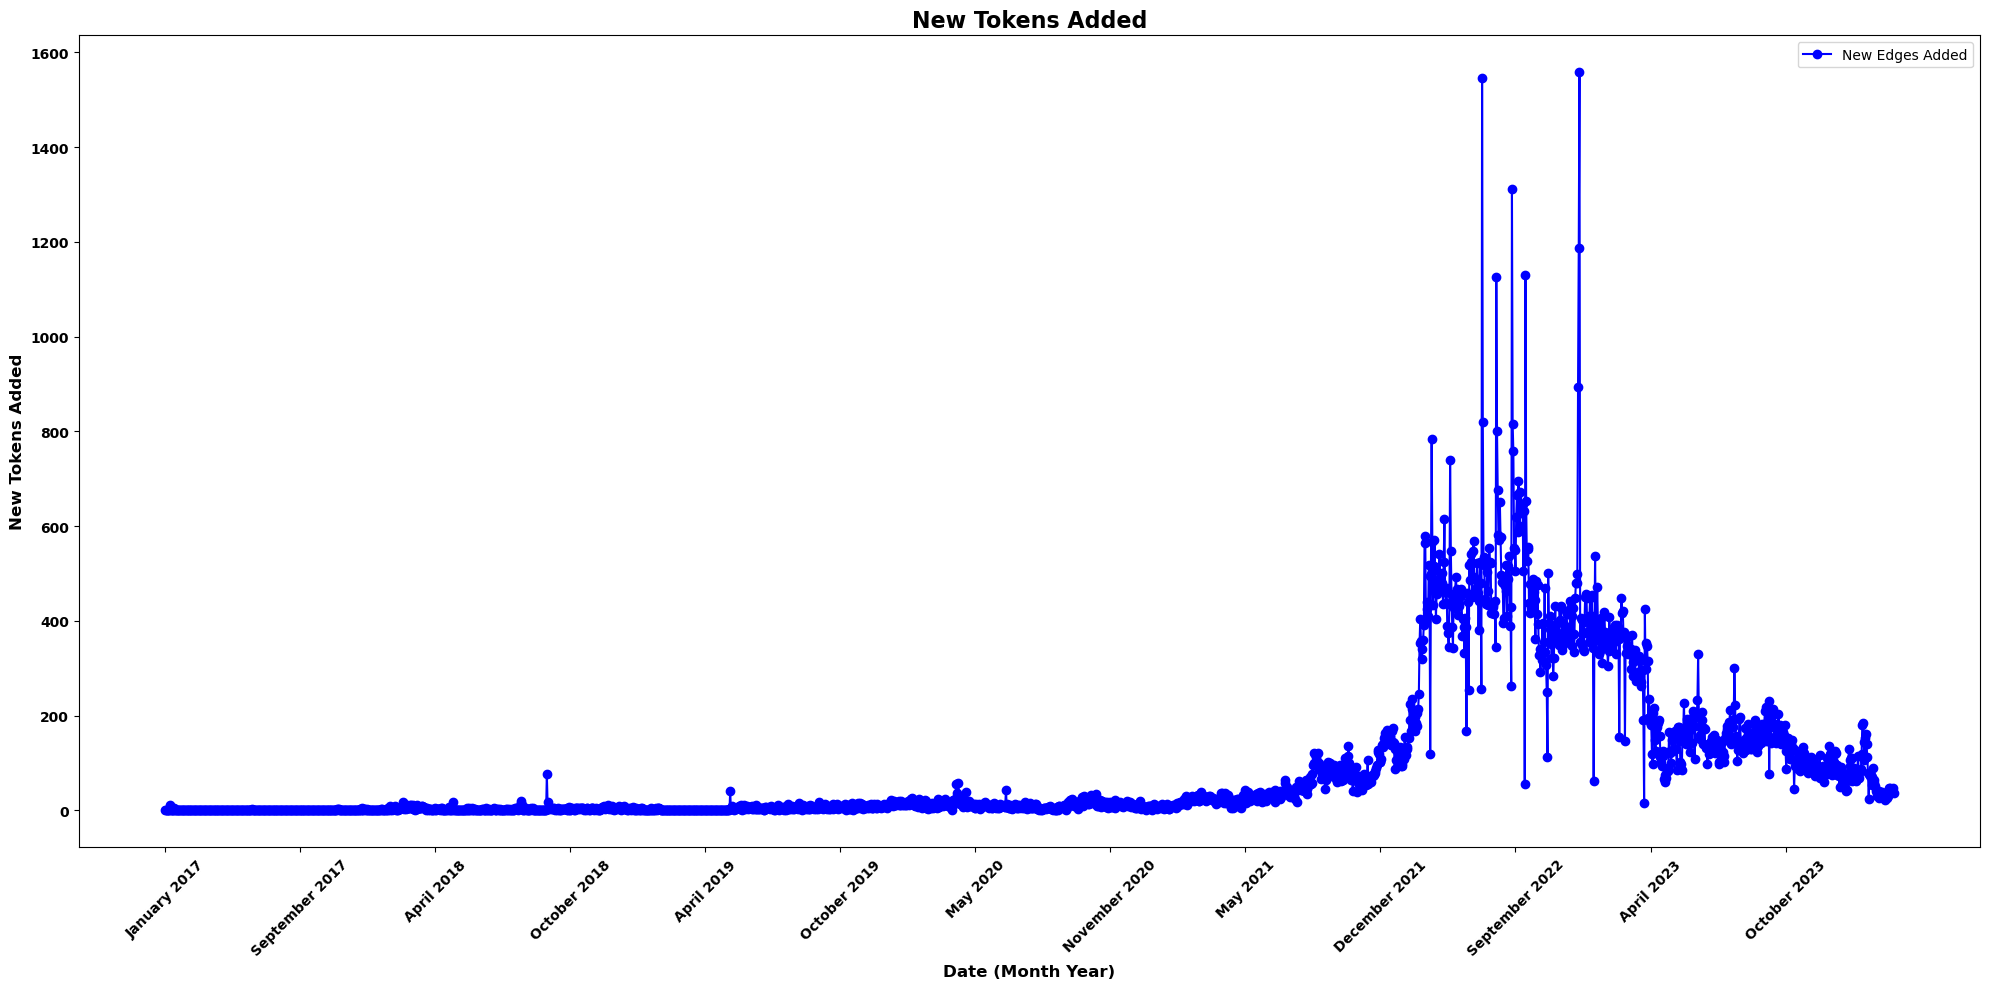

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/new_tokens_count_per_day_2017.csv'
df = pd.read_csv(file_path)

# Print column names to verify
print("Column names in the DataFrame:", df.columns.tolist())

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Update the column name based on the actual name from the printed output
total_edges_column_name = 'New Edges Added'  # Change this if necessary

# Verify if the column exists
if total_edges_column_name not in df.columns:
    raise ValueError(f"Column '{total_edges_column_name}' not found in the DataFrame.")

total_edges = df[total_edges_column_name].sum()
print(f"New Edges Added: {total_edges}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Date'])

# Sort data by the 'Day' column
df.sort_values(by='Date', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='New Edges Added')

# Set x-axis labels every 190 days
step_size = 190
selected_indices = list(range(0, len(df), step_size))

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],
    rotation=45,
    fontsize=10,
    fontweight='bold'
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('New Tokens Added', fontsize=12, fontweight='bold')
plt.title('New Tokens Added', fontsize=16, fontweight='bold')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Column names in the DataFrame: ['Date', 'New Edges Added']
New Edges Added: 213207


/tmp/ipykernel_5081/269007875.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by='Day', inplace=True)


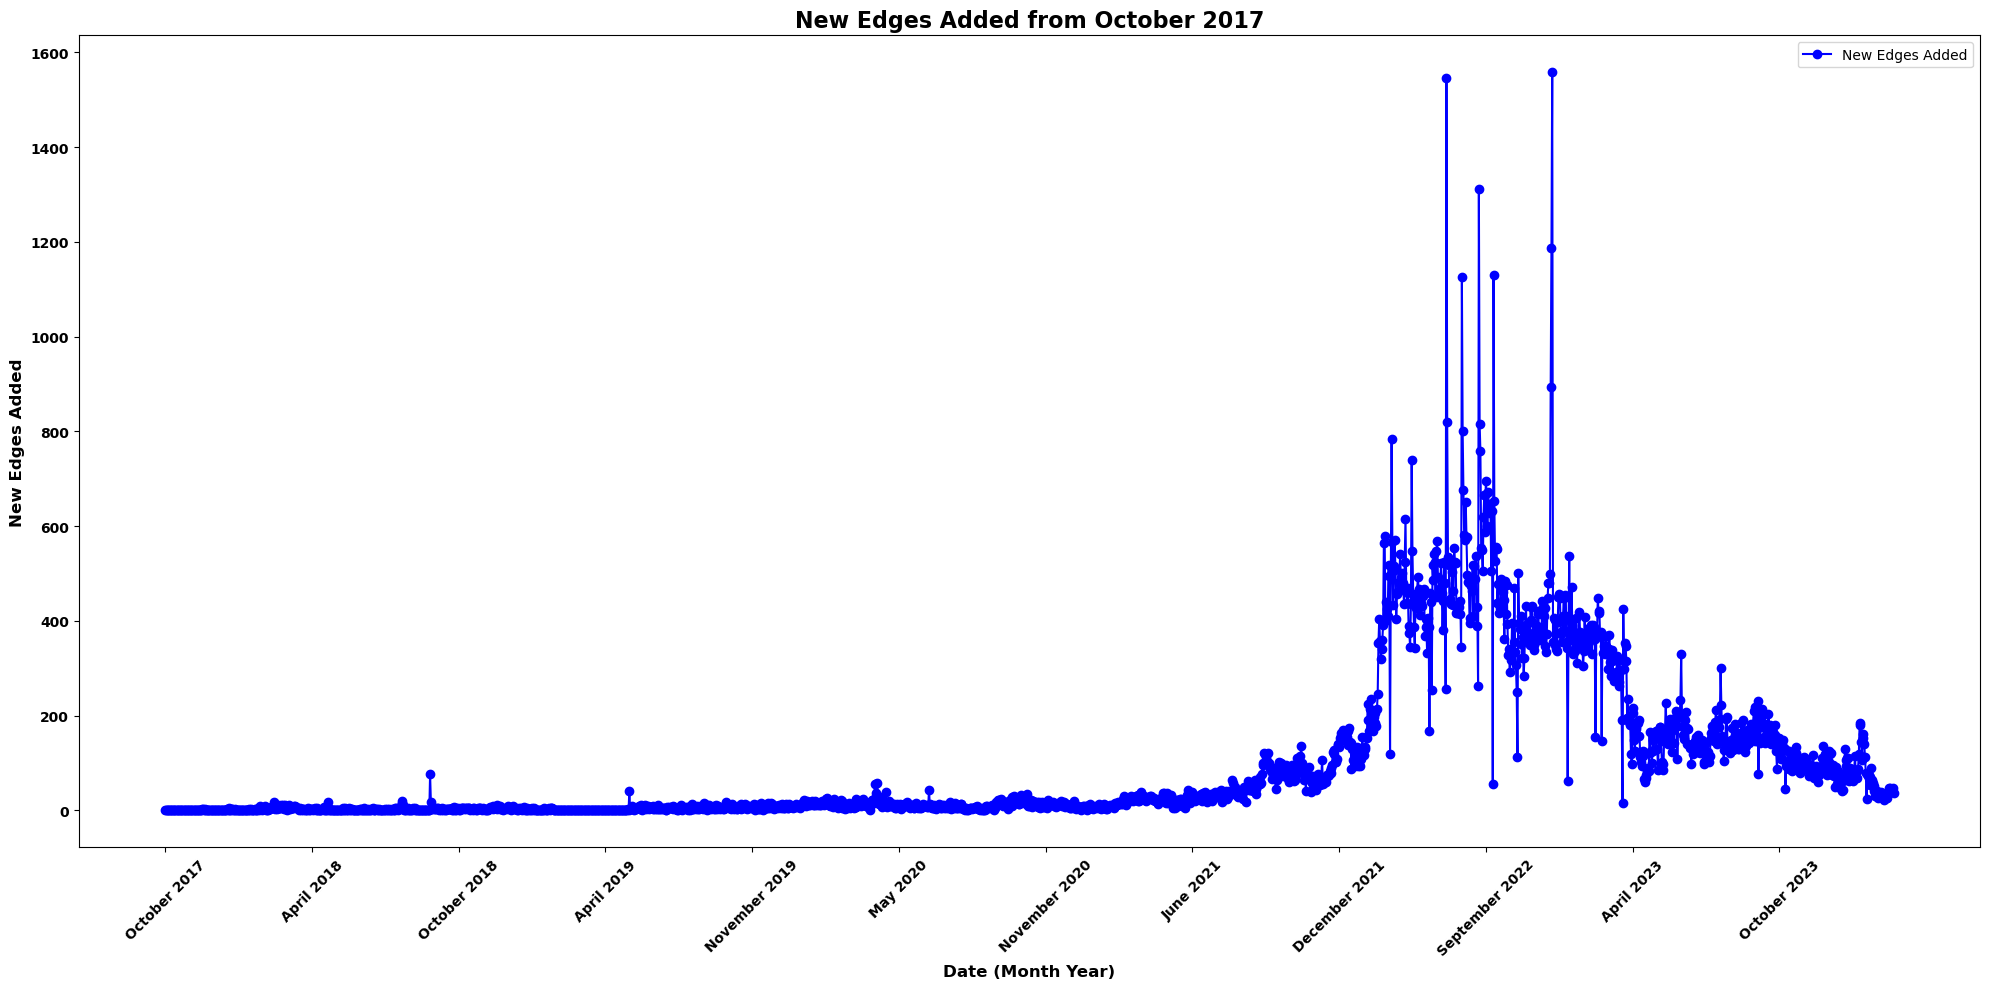

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_csv_data_2017/new_tokens_count_per_day_2017.csv'
df = pd.read_csv(file_path)

# Print column names to verify
print("Column names in the DataFrame:", df.columns.tolist())

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Update the column name based on the actual name from the printed output
total_edges_column_name = 'New Edges Added'  # Change this if necessary

# Verify if the column exists
if total_edges_column_name not in df.columns:
    raise ValueError(f"Column '{total_edges_column_name}' not found in the DataFrame.")

total_edges = df[total_edges_column_name].sum()
print(f"New Edges Added: {total_edges}")

# Convert the 'Date' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Date'])

# Filter the DataFrame to include only dates from October 2017 onward
start_date = '2017-10-01'
df_filtered = df[df['Day'] >= start_date]

# Sort data by the 'Day' column
df_filtered.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df_filtered))

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df_filtered[total_edges_column_name].values, marker='o', linestyle='-', color='b', label='New Edges Added')

# Set x-axis labels every 190 days
step_size = 190
selected_indices = list(range(0, len(df_filtered), step_size))

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df_filtered['Day'].dt.strftime('%B %Y').iloc[selected_indices],
    rotation=45,
    fontsize=10,
    fontweight='bold'
)

plt.yticks(fontweight='bold')

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('New Edges Added', fontsize=12, fontweight='bold')
plt.title('New Edges Added from October 2017', fontsize=16, fontweight='bold')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()
